In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import geopandas as gpd
import plotly.graph_objs as go
sns.set_theme()

## Upload the datasets
Quick Dataset Overview

In [98]:
demo=pd.read_csv("C:\\Users\DannyC19\Desktop\Python\EDA project\Germany\demographics_de.csv")
covid=pd.read_csv("C:\\Users\DannyC19\Desktop\Python\EDA project\Germany\covid_de.csv",parse_dates = ['date'], index_col="date")
vaccines=pd.read_csv("C:\\Users\DannyC19\Desktop\Python\EDA project\Germany\covid_de_vaccines.csv",parse_dates = ['date'],index_col="date")
#demo22=pd.read_csv("C:\\Users\DannyC19\Desktop\Python\EDA project\Germany-2022")

In [3]:
#Demo
print(demo.shape)
demo.head()

(192, 4)


,state,gender,age_group,population
0,Baden-Wuerttemberg,female,00-04,261674
1,Baden-Wuerttemberg,female,05-14,490822
2,Baden-Wuerttemberg,female,15-34,1293488
3,Baden-Wuerttemberg,female,35-59,1919649
4,Baden-Wuerttemberg,female,60-79,1182736


In [4]:
#covid
print(covid.shape)
covid.sample(7)

(2790555, 7)


,state,county,age_group,gender,cases,deaths,recovered
date,,,,,,,
2020-11-18,Bayern,LK Aschaffenburg,35-59,F,13,0,13
2021-10-15,Baden-Wuerttemberg,LK Biberach,15-34,M,7,0,7
2021-04-03,Baden-Wuerttemberg,LK Schwaebisch Hall,35-59,F,15,0,15
2022-08-17,Brandenburg,SK Brandenburg a.d.Havel,60-79,F,5,0,5
2021-03-22,Brandenburg,SK Potsdam,05-14,M,1,0,1
2022-05-27,Baden-Wuerttemberg,LK Enzkreis,05-14,F,1,0,1
2022-03-19,Hessen,LK Main-Taunus-Kreis,00-04,F,5,0,5


In [5]:
#vaccines
print(vaccines.shape)
vaccines.head(7)

(757, 8)


,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul
date,,,,,,,,
2020-12-27,24427,24427,0,24418,8,1,24427,0
2020-12-28,18073,18073,0,42489,9,2,42500,0
2020-12-29,50229,50229,0,92717,9,3,92729,0
2020-12-30,64213,64213,0,156929,10,3,156942,0
2020-12-31,49985,49985,0,206912,12,3,206927,0
2021-01-01,25723,25723,0,232614,27,7,232650,0
2021-01-02,47835,47835,0,280446,28,7,280485,0


In [21]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   state       192 non-null    object
 1   gender      192 non-null    object
 2   age_group   192 non-null    object
 3   population  192 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.1+ KB


In [6]:
demo.nunique()

state          16
gender          2
age_group       6
population    192
dtype: int64

In [8]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2890909 entries, 2020-03-27 to 2022-08-24
Data columns (total 7 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   state      object
 1   county     object
 2   age_group  object
 3   gender     object
 4   cases      int64 
 5   deaths     int64 
 6   recovered  int64 
dtypes: int64(3), object(4)
memory usage: 176.4+ MB


In [7]:
covid.nunique()

state         16
county       411
age_group      6
gender         2
cases        951
deaths        21
recovered    955
dtype: int64

In [8]:
covid.describe()

,cases,deaths,recovered
count,2.790555e+06,2.790555e+06,2.790555e+06
mean,1.333496e+01,5.761148e-02,1.305119e+01
std,3.009627e+01,3.214108e-01,3.006811e+01
min,1.000000e+00,0.000000e+00,-1.000000e+00
25%,2.000000e+00,0.000000e+00,1.000000e+00
50%,4.000000e+00,0.000000e+00,4.000000e+00
75%,1.200000e+01,0.000000e+00,1.200000e+01
max,2.156000e+03,2.100000e+01,2.156000e+03


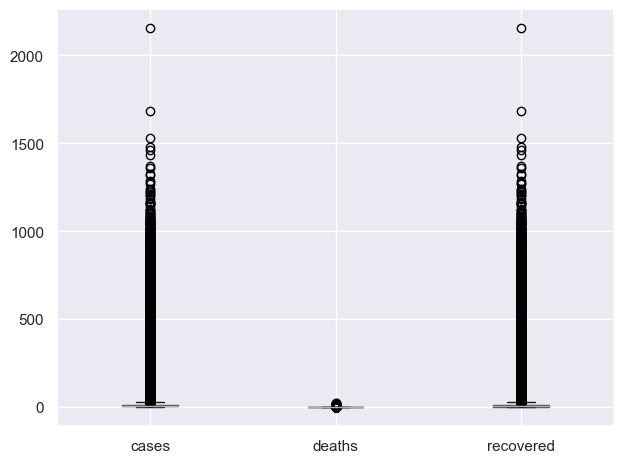

In [9]:
#Using boxplots to identify outliers within numeric data
fig, ax = plt.subplots(nrows=1, ncols=1)
ax = covid.boxplot()
fig.tight_layout()

In [6]:
vaccines.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 757 entries, 2020-12-27 to 2023-01-22
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   doses                757 non-null    int64
 1   doses_first          757 non-null    int64
 2   doses_second         757 non-null    int64
 3   pfizer_cumul         757 non-null    int64
 4   moderna_cumul        757 non-null    int64
 5   astrazeneca_cumul    757 non-null    int64
 6   persons_first_cumul  757 non-null    int64
 7   persons_full_cumul   757 non-null    int64
dtypes: int64(8)
memory usage: 53.2 KB


In [7]:
vaccines.nunique()

doses                  755
doses_first            729
doses_second           719
pfizer_cumul           757
moderna_cumul          752
astrazeneca_cumul      573
persons_first_cumul    757
persons_full_cumul     739
dtype: int64

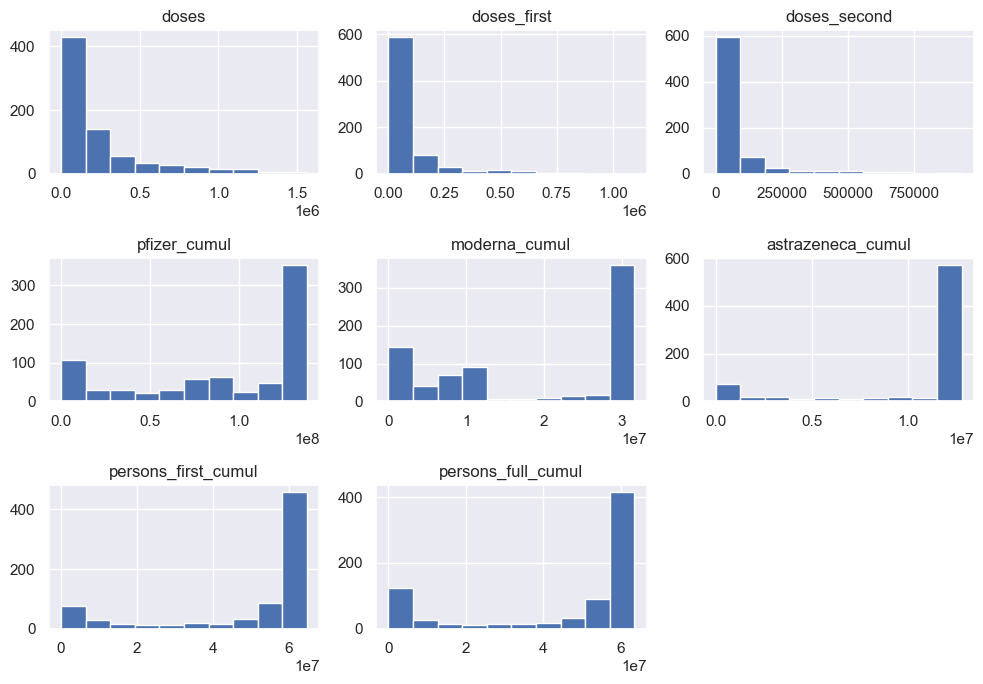

In [134]:
vaccines.hist(figsize=(10,7))
plt.tight_layout()
plt.show()

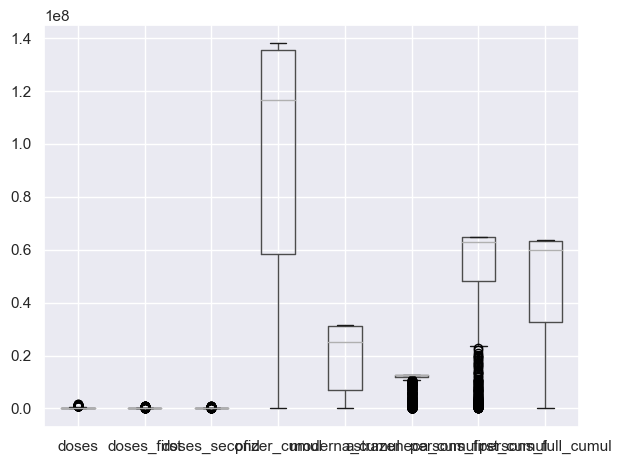

In [135]:
#Using boxplots to identify outliers within numeric data
fig, ax = plt.subplots(nrows=1, ncols=1)
ax = vaccines.boxplot()
fig.tight_layout()
# astrazeneca_cumul & persons_first_cumul have outliers

## Identify Missing Data

In [6]:
print(demo.isnull().sum())
print(covid.isnull().sum())
print(vaccines.isnull().sum())

state         0
gender        0
age_group     0
population    0
dtype: int64
state             0
county            0
age_group     13876
gender       125625
cases             0
deaths            0
recovered         0
dtype: int64
doses                  0
doses_first            0
doses_second           0
pfizer_cumul           0
moderna_cumul          0
astrazeneca_cumul      0
persons_first_cumul    0
persons_full_cumul     0
dtype: int64


In [7]:
#rows that miss both age_group and gender
covid[covid.age_group.isnull() &covid.gender.isnull()]

,state,county,age_group,gender,cases,deaths,recovered
date,,,,,,,
2022-02-18,Baden-Wuerttemberg,LK Alb-Donau-Kreis,NaN,NaN,1,0,1
2022-01-19,Baden-Wuerttemberg,LK Boeblingen,NaN,NaN,1,0,1
2022-01-20,Baden-Wuerttemberg,LK Boeblingen,NaN,NaN,1,0,1
2022-01-25,Baden-Wuerttemberg,LK Boeblingen,NaN,NaN,1,0,1
2022-01-31,Baden-Wuerttemberg,LK Boeblingen,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...
2021-03-24,Thueringen,LK Sonneberg,NaN,NaN,2,0,2
2021-11-24,Thueringen,LK Unstrut-Hainich-Kreis,NaN,NaN,1,0,1
2022-12-20,Thueringen,SK Jena,NaN,NaN,1,0,1


In [14]:
#Percentage of missing age data out of all

print(f'In age_group {len(covid[covid.age_group.isnull()])*100/len(covid)}% of values are missing')

In age_group 0.47998743647759234% of values are missing


In [15]:
#Percentage of missing gender data out of all
print(f'In gender {len(covid[covid.gender.isnull()])*100/len(covid)}% of values are missing')

In gender 4.34551900457607% of values are missing


# Data analysis

### Demographic parameters

In [4]:
demo

,state,gender,age_group,population
0,Baden-Wuerttemberg,female,00-04,261674
1,Baden-Wuerttemberg,female,05-14,490822
2,Baden-Wuerttemberg,female,15-34,1293488
3,Baden-Wuerttemberg,female,35-59,1919649
4,Baden-Wuerttemberg,female,60-79,1182736
...,...,...,...,...
187,Thueringen,male,05-14,92545
188,Thueringen,male,15-34,214553
189,Thueringen,male,35-59,384822
190,Thueringen,male,60-79,264189


In [137]:
#Add a column with area ( km^2)
area={'Baden-Wuerttemberg':35752, 'Bayern':70552, 'Berlin':892, 'Brandenburg':29480, 'Bremen':419,
       'Hamburg':755, 'Hessen':21115, 'Mecklenburg-Vorpommern':23180, 'Niedersachsen':47609,
       'Nordrhein-Westfalen':34085, 'Rheinland-Pfalz':19853, 'Saarland':2569, 'Sachsen':18416,
       'Sachsen-Anhalt':20446, 'Schleswig-Holstein':15799, 'Thueringen':16172}
demo['area'] = demo['state'].map(area)
demo

,state,gender,age_group,population,area
0,Baden-Wuerttemberg,female,00-04,261674,35752
1,Baden-Wuerttemberg,female,05-14,490822,35752
2,Baden-Wuerttemberg,female,15-34,1293488,35752
3,Baden-Wuerttemberg,female,35-59,1919649,35752
4,Baden-Wuerttemberg,female,60-79,1182736,35752
...,...,...,...,...,...
187,Thueringen,male,05-14,92545,16172
188,Thueringen,male,15-34,214553,16172
189,Thueringen,male,35-59,384822,16172
190,Thueringen,male,60-79,264189,16172


In [142]:
#states by area
demo.groupby('state')['area'].mean().sort_values(ascending=False)

state
Bayern                    70552.0
Niedersachsen             47609.0
Baden-Wuerttemberg        35752.0
Nordrhein-Westfalen       34085.0
Brandenburg               29480.0
Mecklenburg-Vorpommern    23180.0
Hessen                    21115.0
Sachsen-Anhalt            20446.0
Rheinland-Pfalz           19853.0
Sachsen                   18416.0
Thueringen                16172.0
Schleswig-Holstein        15799.0
Saarland                   2569.0
Berlin                      892.0
Hamburg                     755.0
Bremen                      419.0
Name: area, dtype: float64

#### Show states by population

                        population
state                             
Baden-Wuerttemberg        11069533
Bayern                    13076721
Berlin                     3644826
Brandenburg                2511917
Bremen                      682986
Hamburg                    1841179
Hessen                     6265809
Mecklenburg-Vorpommern     1609675
Niedersachsen              7982448
Nordrhein-Westfalen       17932651
Rheinland-Pfalz            4084844
Saarland                    990509
Sachsen                    4077937
Sachsen-Anhalt             2208321
Schleswig-Holstein         2896712
Thueringen                 2143145


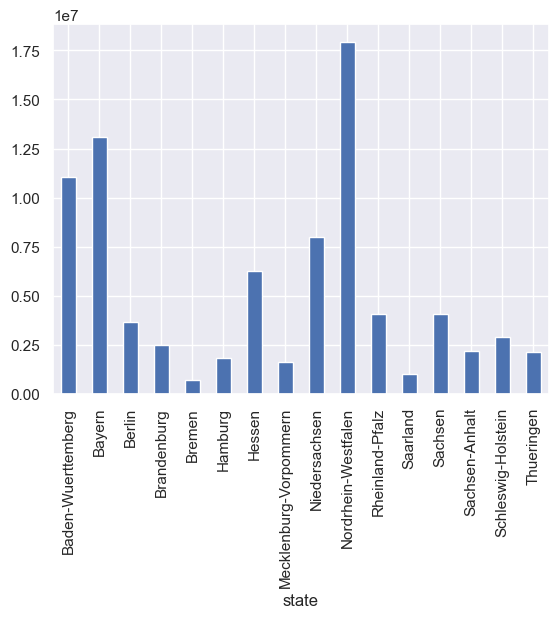

In [84]:
#states by population

#print(demo.groupby('state')['population'].sum().sort_values(ascending=False))
population=demo.groupby('state')['population'].sum()
population=population.reset_index().rename(columns={0: 'population'})
population = population.sort_values('state')
population.set_index('state',inplace=True)

print(population)
demo.groupby('state')['population'].sum().plot.bar()
plt.show()

#### Present on map each county by population

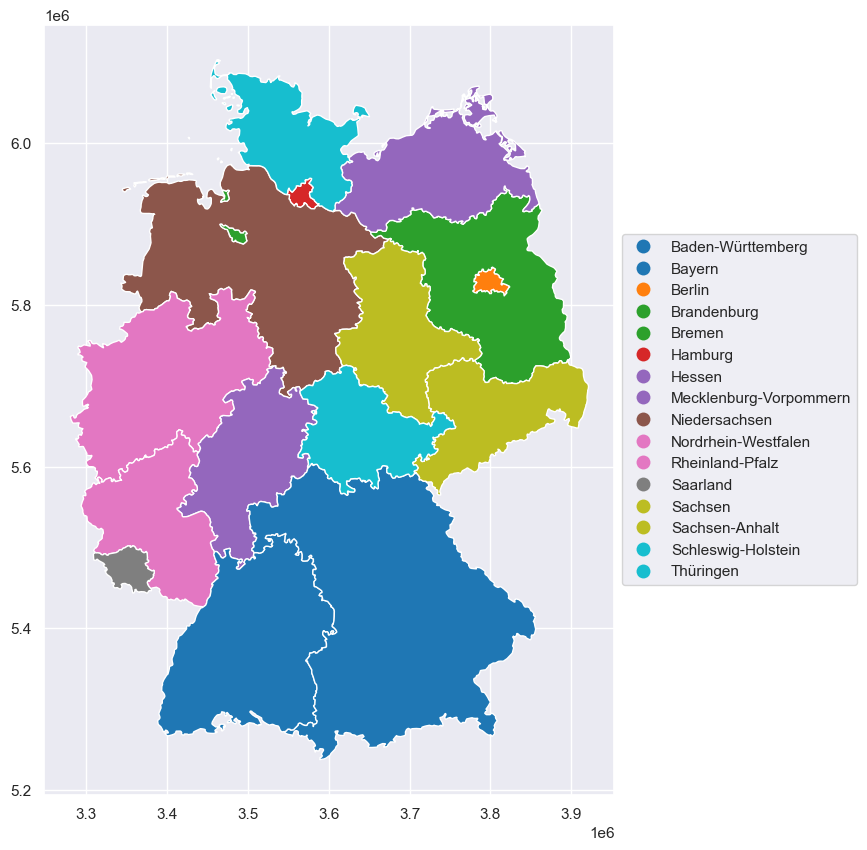

In [18]:
# Map presentation with geoPandas
gdf = gpd.read_file("C:\\Users\DannyC19\Desktop\Python\EDA project\Germany\de_state.shp")
gdf.plot(categorical = True, column = 'GEN', legend = True,figsize = (10,10),edgecolor = 'white', legend_kwds = {'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
plt.show()

In [67]:
gdf

,ADE,RS,RS_0,geometry
GEN,,,,
Baden-Württemberg,2,08,080000000000,"MULTIPOLYGON (((3475285.294 5283087.348, 34749..."
Bayern,2,09,090000000000,"POLYGON ((3609551.484 5269631.549, 3610838.499..."
Berlin,2,11,110000000000,"POLYGON ((3812872.568 5833365.938, 3813771.098..."
Brandenburg,2,12,120000000000,"POLYGON ((3823551.364 5938130.505, 3826515.656..."
Bremen,2,04,040000000000,"MULTIPOLYGON (((3468658.496 5898364.974, 34702..."
Hamburg,2,02,020000000000,"MULTIPOLYGON (((3578695.661 5955304.456, 35781..."
Hessen,2,06,060000000000,"POLYGON ((3535084.230 5721608.644, 3535279.888..."
Mecklenburg-Vorpommern,2,13,130000000000,"MULTIPOLYGON (((3663270.366 5988236.389, 36627..."
Niedersachsen,2,03,030000000000,"MULTIPOLYGON (((3354775.046 5942939.764, 33546..."


In [68]:
#match state names in gdf and population df
gdf.rename(index={'Baden-Württemberg': 'Baden-Wuerttemberg'}, inplace=True)
gdf.rename(index={'Thüringen': 'Thueringen'}, inplace=True)
gdf

#sort valus by state
# gdf=gdf.sort_values(by=['GEN'] )
# gdf.set_index('GEN', inplace = True)



,ADE,RS,RS_0,geometry
GEN,,,,
Baden-Wuerttemberg,2,08,080000000000,"MULTIPOLYGON (((3475285.294 5283087.348, 34749..."
Bayern,2,09,090000000000,"POLYGON ((3609551.484 5269631.549, 3610838.499..."
Berlin,2,11,110000000000,"POLYGON ((3812872.568 5833365.938, 3813771.098..."
Brandenburg,2,12,120000000000,"POLYGON ((3823551.364 5938130.505, 3826515.656..."
Bremen,2,04,040000000000,"MULTIPOLYGON (((3468658.496 5898364.974, 34702..."
Hamburg,2,02,020000000000,"MULTIPOLYGON (((3578695.661 5955304.456, 35781..."
Hessen,2,06,060000000000,"POLYGON ((3535084.230 5721608.644, 3535279.888..."
Mecklenburg-Vorpommern,2,13,130000000000,"MULTIPOLYGON (((3663270.366 5988236.389, 36627..."
Niedersachsen,2,03,030000000000,"MULTIPOLYGON (((3354775.046 5942939.764, 33546..."


In [63]:
population

,population
state,
Baden-Wuerttemberg,11069533
Bayern,13076721
Berlin,3644826
Brandenburg,2511917
Bremen,682986
Hamburg,1841179
Hessen,6265809
Mecklenburg-Vorpommern,1609675
Niedersachsen,7982448


In [69]:
PopulationByState = gdf.join(population)
PopulationByState.reset_index(inplace = True)
PopulationByState


,GEN,ADE,RS,RS_0,geometry,population
0,Baden-Wuerttemberg,2,08,080000000000,"MULTIPOLYGON (((3475285.294 5283087.348, 34749...",11069533
1,Bayern,2,09,090000000000,"POLYGON ((3609551.484 5269631.549, 3610838.499...",13076721
2,Berlin,2,11,110000000000,"POLYGON ((3812872.568 5833365.938, 3813771.098...",3644826
3,Brandenburg,2,12,120000000000,"POLYGON ((3823551.364 5938130.505, 3826515.656...",2511917
4,Bremen,2,04,040000000000,"MULTIPOLYGON (((3468658.496 5898364.974, 34702...",682986
5,Hamburg,2,02,020000000000,"MULTIPOLYGON (((3578695.661 5955304.456, 35781...",1841179
6,Hessen,2,06,060000000000,"POLYGON ((3535084.230 5721608.644, 3535279.888...",6265809
7,Mecklenburg-Vorpommern,2,13,130000000000,"MULTIPOLYGON (((3663270.366 5988236.389, 36627...",1609675
8,Niedersachsen,2,03,030000000000,"MULTIPOLYGON (((3354775.046 5942939.764, 33546...",7982448
9,Nordrhein-Westfalen,2,05,050000000000,"POLYGON ((3477450.781 5820982.368, 3479895.578...",17932651


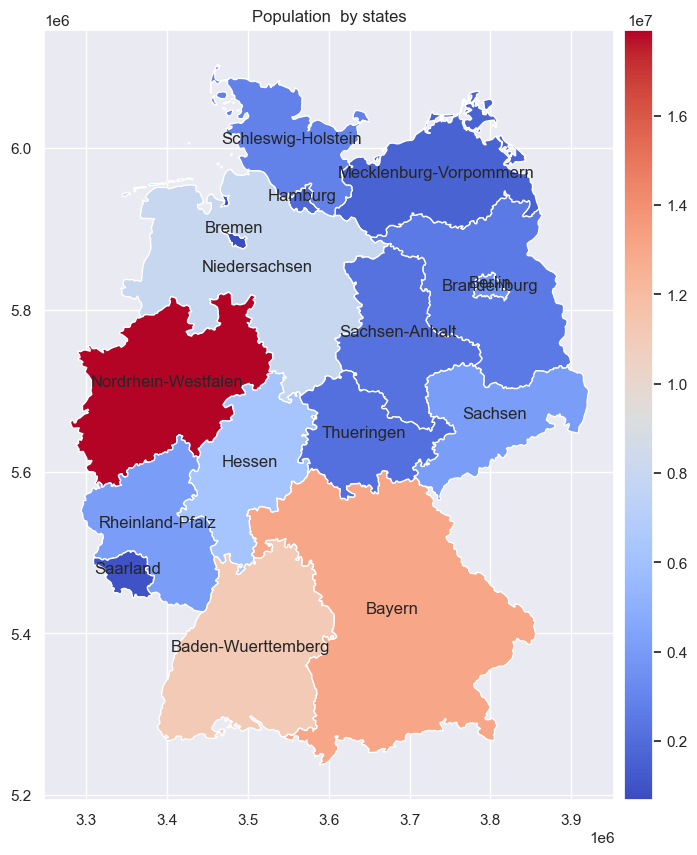

In [70]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Population  by states")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
PopulationByState.plot( column='population', ax=ax, cmap='coolwarm', legend=True, cax = cax, vmin=682986, vmax=17932651)
PopulationByState.apply(lambda x: ax.annotate(text=x['GEN'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)


plt.show()



#### Look at population density

In [143]:

# group the data frame by state and apply a lambda function to calculate population density
density = demo.groupby('state').apply(lambda x: x['population'].sum() / x['area'].iloc[0])

# rename the columns of the resulting data frame
density = density.reset_index().rename(columns={0: 'population_density'})
#print(density.sort_values(by =['population_density'],ascending=False))
density.set_index('state', inplace=True)
print(density.sort_values(by='population_density', ascending=False))

# merge the original data frame with the density data frame on the "state" column
demo = pd.merge(demo, density, on='state')



                        population_density
state                                     
Berlin                         4086.127803
Hamburg                        2438.647682
Bremen                         1630.038186
Nordrhein-Westfalen             526.115623
Saarland                        385.562086
Baden-Wuerttemberg              309.619965
Hessen                          296.746815
Sachsen                         221.434459
Rheinland-Pfalz                 205.754496
Bayern                          185.348693
Schleswig-Holstein              183.347807
Niedersachsen                   167.666786
Thueringen                      132.521952
Sachsen-Anhalt                  108.007483
Brandenburg                      85.207497
Mecklenburg-Vorpommern           69.442407


In [72]:
DensityByState = gdf.join(density)
DensityByState.reset_index(inplace = True)
DensityByState

,GEN,ADE,RS,RS_0,geometry,population_density
0,Baden-Wuerttemberg,2,08,080000000000,"MULTIPOLYGON (((3475285.294 5283087.348, 34749...",309.619965
1,Bayern,2,09,090000000000,"POLYGON ((3609551.484 5269631.549, 3610838.499...",185.348693
2,Berlin,2,11,110000000000,"POLYGON ((3812872.568 5833365.938, 3813771.098...",4086.127803
3,Brandenburg,2,12,120000000000,"POLYGON ((3823551.364 5938130.505, 3826515.656...",85.207497
4,Bremen,2,04,040000000000,"MULTIPOLYGON (((3468658.496 5898364.974, 34702...",1630.038186
5,Hamburg,2,02,020000000000,"MULTIPOLYGON (((3578695.661 5955304.456, 35781...",2438.647682
6,Hessen,2,06,060000000000,"POLYGON ((3535084.230 5721608.644, 3535279.888...",296.746815
7,Mecklenburg-Vorpommern,2,13,130000000000,"MULTIPOLYGON (((3663270.366 5988236.389, 36627...",69.442407
8,Niedersachsen,2,03,030000000000,"MULTIPOLYGON (((3354775.046 5942939.764, 33546...",167.666786
9,Nordrhein-Westfalen,2,05,050000000000,"POLYGON ((3477450.781 5820982.368, 3479895.578...",526.115623


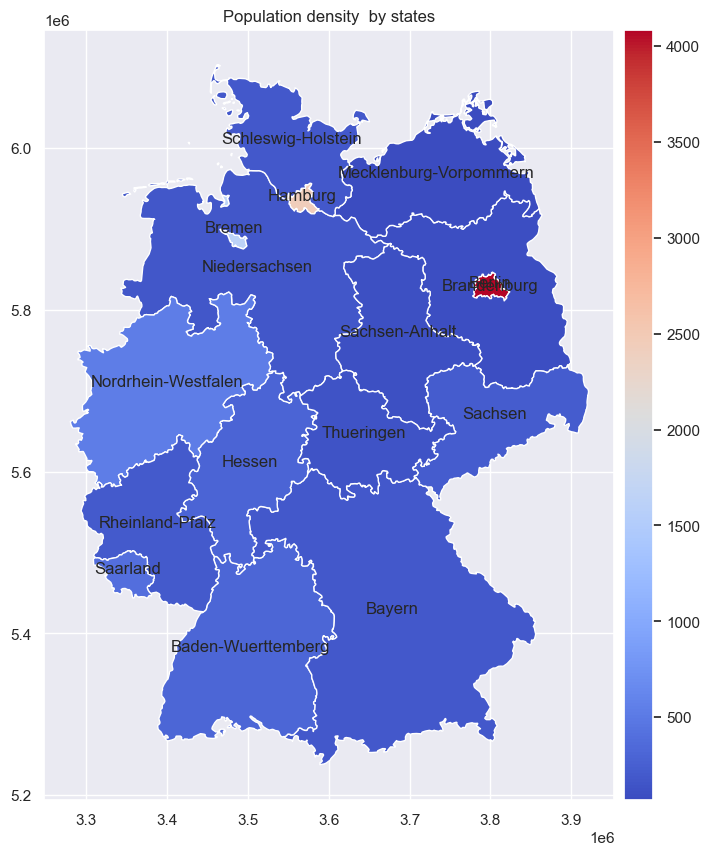

In [75]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Population density  by states")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
DensityByState.plot( column='population_density', ax=ax, cmap='coolwarm', legend=True, cax = cax)
DensityByState.apply(lambda x: ax.annotate(text=x['GEN'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)


plt.show()
#population density is not a good parameter to work with. Will continiue with population

#### Is there a correlation between population  and number of cases/deaths?

In [88]:
population1=demo.groupby('state')['population'].sum()
population1=population1.reset_index().rename(columns={0: 'population'})
population1

,state,population
0,Baden-Wuerttemberg,11069533
1,Bayern,13076721
2,Berlin,3644826
3,Brandenburg,2511917
4,Bremen,682986
5,Hamburg,1841179
6,Hessen,6265809
7,Mecklenburg-Vorpommern,1609675
8,Niedersachsen,7982448
9,Nordrhein-Westfalen,17932651


In [89]:
#Join population with cases, deaths, recovery by state
CovidByState=covid.groupby('state').sum()
CovidByState=pd.merge(CovidByState,population1,on="state")
CovidByState=CovidByState.set_index('state')
CovidByState=CovidByState.sort_values("population",ascending=False)
CovidByState

,cases,deaths,recovered,population
state,,,,
Nordrhein-Westfalen,7741625,29730,7552531,17932651
Bayern,6597086,27452,6523024,13076721
Baden-Wuerttemberg,4955962,18494,4879061,11069533
Niedersachsen,3726279,12230,3613935,7982448
Hessen,2838126,11857,2779922,6265809
Rheinland-Pfalz,1715006,6626,1680059,4084844
Sachsen,1927930,16518,1881262,4077937
Berlin,1395995,5236,1357668,3644826
Schleswig-Holstein,1150078,3282,1115913,2896712


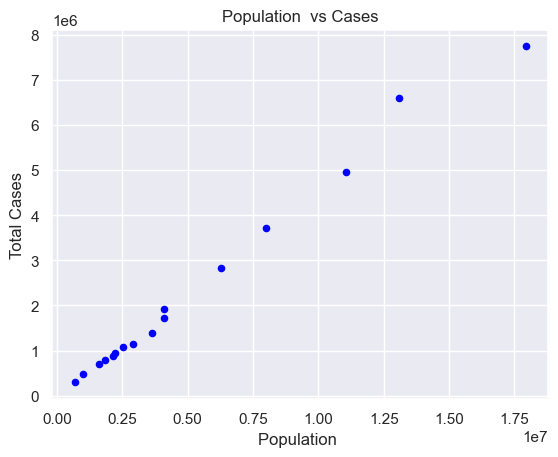

In [90]:
#create scatter plot  with population density and cases number to see possible correlation
CovidByState.plot.scatter(x='population',y='cases',color='blue')
plt.title('Population  vs Cases')
plt.xlabel('Population ')
plt.ylabel('Total Cases')
plt.show()

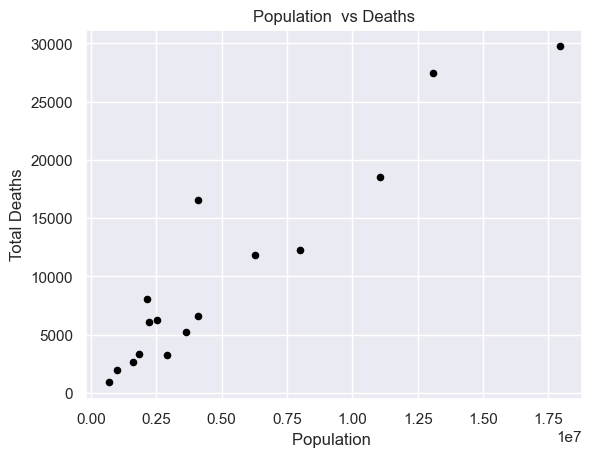

In [91]:
#create scatter plot  with population density and death number to see possible correlation
CovidByState.plot.scatter(x='population',y='deaths',color='black')
plt.title('Population  vs Deaths')
plt.xlabel('Population ')
plt.ylabel('Total Deaths')
plt.show()

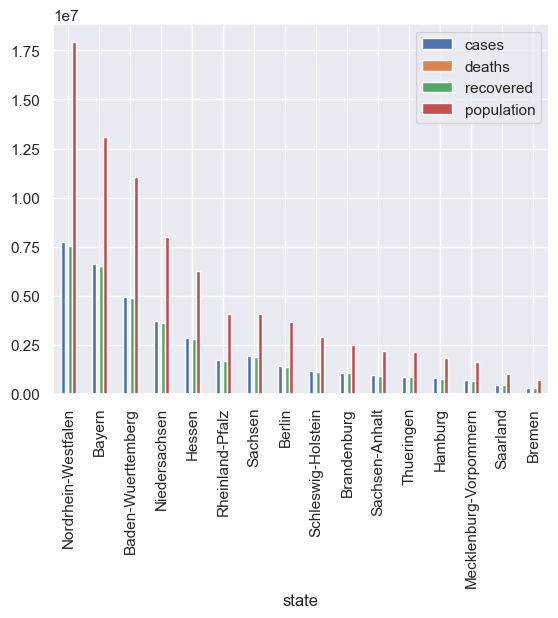

In [144]:
CovidByState.plot.bar()
plt.show()

### Create population pyramid

In [23]:
# calculate the percent from total population in Germany
total=demo[['age_group','gender','population']] # df without states and area
print(demo['population'].sum())           # total population in Germany
total['percent']=(total['population']/demo['population'].sum())*100
total

83019213


C:\Users\DannyC19\AppData\Local\Temp\ipykernel_20360\1756338042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total['percent']=(total['population']/demo['population'].sum())*100


,age_group,gender,population,percent
0,00-04,female,261674,0.315197
1,05-14,female,490822,0.591215
2,15-34,female,1293488,1.558059
3,35-59,female,1919649,2.312295
4,60-79,female,1182736,1.424653
...,...,...,...,...
187,05-14,male,92545,0.111474
188,15-34,male,214553,0.258438
189,35-59,male,384822,0.463534
190,60-79,male,264189,0.318226


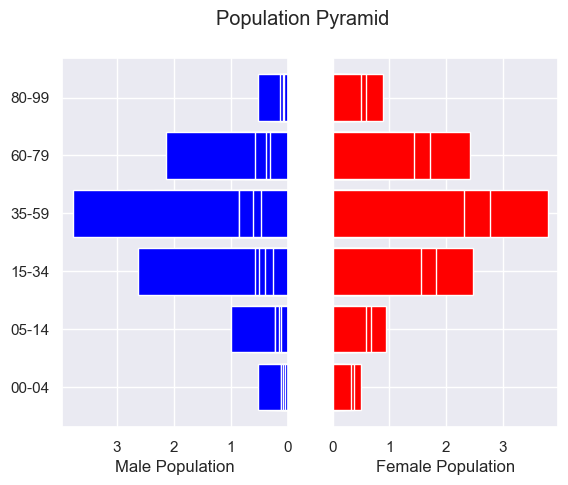

In [31]:

# separate the data frame into male and female populations
male_pop = total[total['gender'] == 'male']
female_pop = total[total['gender'] == 'female']

# reverse the female population data frame
female_pop = female_pop.iloc[::-1]

# create a figure with two subplots
fig, ax = plt.subplots(ncols=2, sharey=True)

# plot the male population as a horizontal bar chart on the left subplot
ax[0].barh(male_pop['age_group'], male_pop['percent'], align='center', color='blue')
ax[0].invert_xaxis()
ax[0].set_xlabel('Male Population')

# plot the female population as a horizontal bar chart on the right subplot
ax[1].barh(female_pop['age_group'], female_pop['percent'], align='center', color='red')
ax[1].set_xlabel('Female Population')

# add a title to the figure
fig.suptitle('Population Pyramid')

# show the plot
plt.show()




<AxesSubplot:>

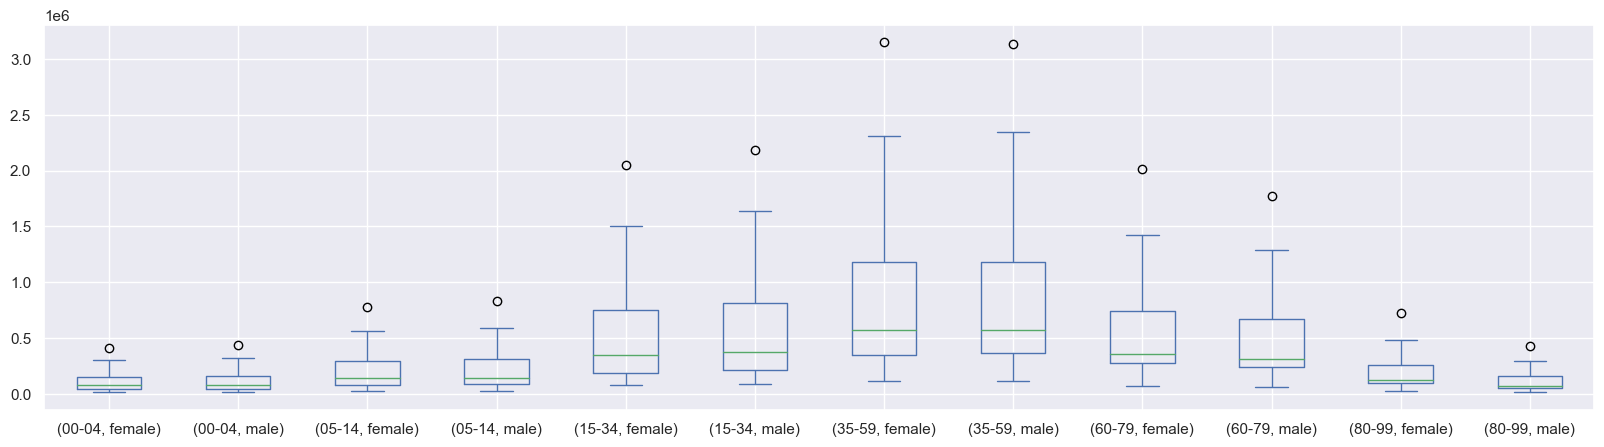

In [156]:
#visualize population by both age and gender
demo.pivot_table(index='state',columns=['age_group','gender'], values="population", aggfunc='sum').plot.box(figsize=(20,5))


<AxesSubplot:xlabel='state'>

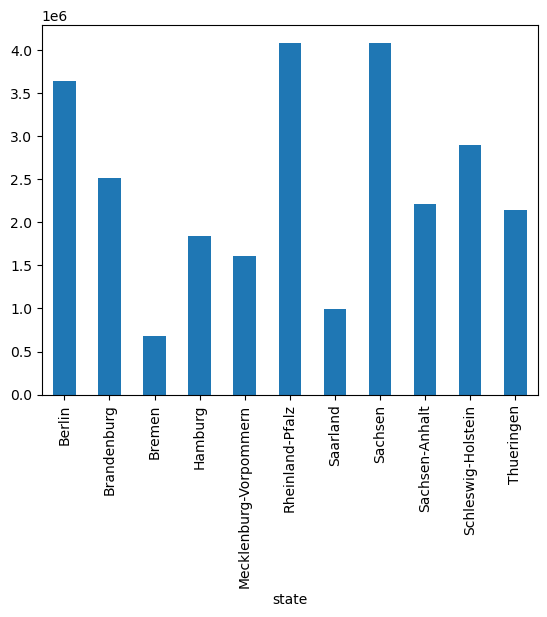

In [56]:
#divide the states to small and large by population
small=demo.groupby('state').filter(lambda grp:grp['population'].sum()<5000000)
large=demo.groupby('state').filter(lambda grp:grp['population'].sum()>5000000)
small.groupby('state')['population'].sum().plot.bar()

<AxesSubplot:xlabel='state'>

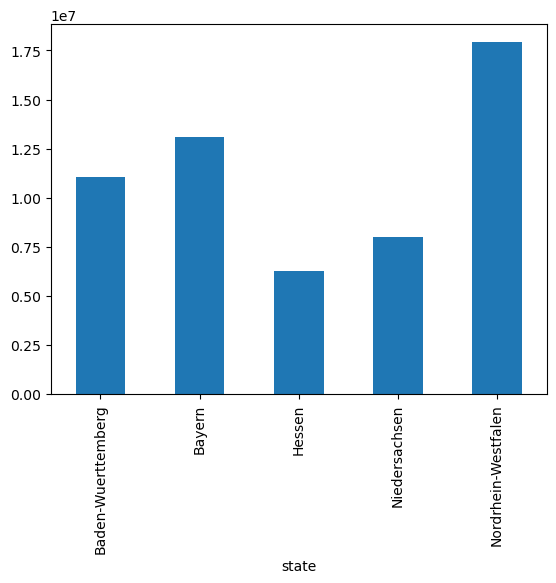

In [57]:
large.groupby('state')['population'].sum().plot.bar()

<AxesSubplot:xlabel='state'>

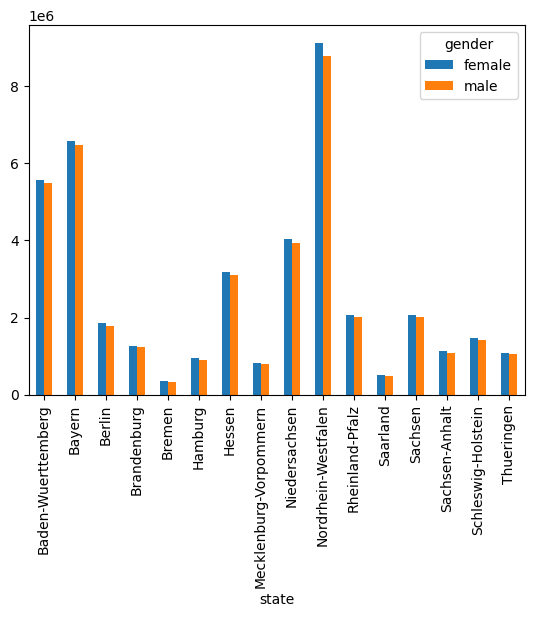

In [18]:
#number of male/ female by state
demo.pivot_table(index='state', columns='gender',values='population', aggfunc='sum').plot.bar()

<AxesSubplot:xlabel='state'>

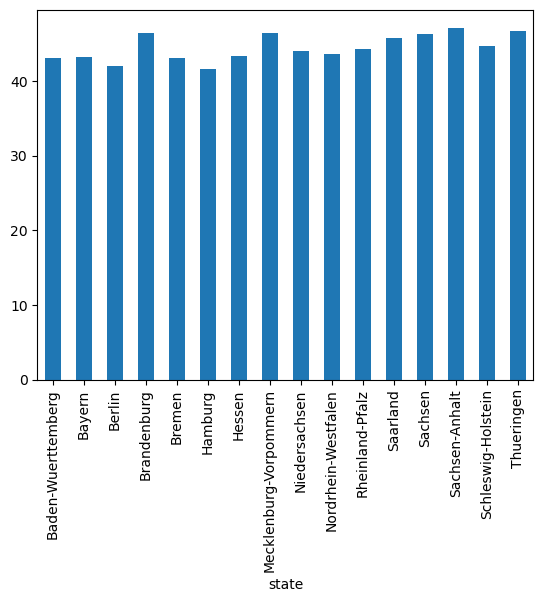

In [46]:

#avg age by state
demo_age=demo[['state','age_group','population']]
demo_age=demo_age.replace({'00-04':2, '05-14':9.5, '15-34':24.5, '35-59':47, '60-79':69.5, '80-99':89.5})

demo_age['a_pop']=demo_age['age_group']*demo_age['population']
total=demo.groupby('state')['population'].sum()


ave=demo_age.groupby('state')['a_pop'].sum()/total
ave.plot.bar()
# no significant difference

<AxesSubplot:xlabel='state'>

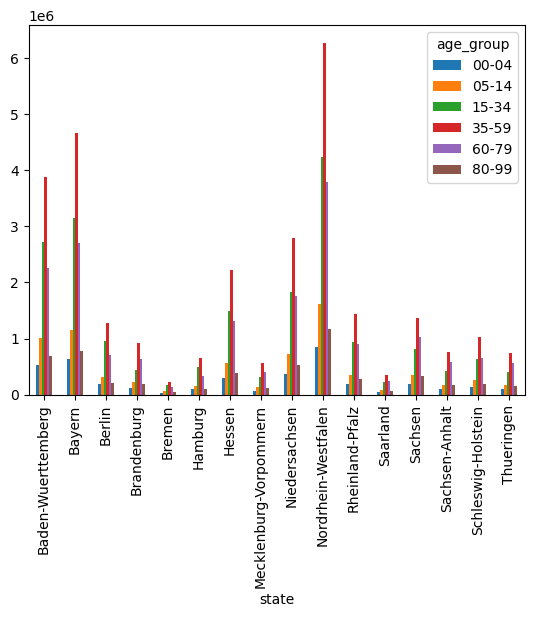

In [48]:
#Age representation per state
#demo.pivot_table(index="state", columns="age_group", values="population",aggfunc="sum").plot.bar()
demo.pivot_table(index="state", columns="age_group", values="population",aggfunc="sum").plot.bar()

## Vaccines analysis

### manufacturers

In [8]:
vaccines

,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul
date,,,,,,,,
2020-12-27,24427,24427,0,24418,8,1,24427,0
2020-12-28,18073,18073,0,42489,9,2,42500,0
2020-12-29,50229,50229,0,92717,9,3,92729,0
2020-12-30,64213,64213,0,156929,10,3,156942,0
2020-12-31,49985,49985,0,206912,12,3,206927,0
...,...,...,...,...,...,...,...,...
2023-01-18,15120,688,312,138014658,31577922,12803023,64866267,63553167
2023-01-19,16594,314,381,138015809,31577955,12803023,64866581,63553548
2023-01-20,10565,334,235,138016521,31578012,12803023,64866915,63553783


In [146]:
# Add colums with manufacturers - convert the cummulative sum into real values
vaccines['pfizer']=vaccines['pfizer_cumul'].diff().fillna(vaccines['pfizer_cumul'].iloc[0])
vaccines['moderna']=vaccines['moderna_cumul'].diff().fillna(vaccines['moderna_cumul'].iloc[0])
vaccines['astrazeneca']=vaccines['astrazeneca_cumul'].diff().fillna(vaccines['astrazeneca_cumul'].iloc[0])
vaccines.head()


,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul,pfizer,moderna,astrazeneca
date,,,,,,,,,,,
2020-12-27,24427,24427,0,24418,8,1,24427,0,24418.0,8.0,1.0
2020-12-28,18073,18073,0,42489,9,2,42500,0,18071.0,1.0,1.0
2020-12-29,50229,50229,0,92717,9,3,92729,0,50228.0,0.0,1.0
2020-12-30,64213,64213,0,156929,10,3,156942,0,64212.0,1.0,0.0
2020-12-31,49985,49985,0,206912,12,3,206927,0,49983.0,2.0,0.0


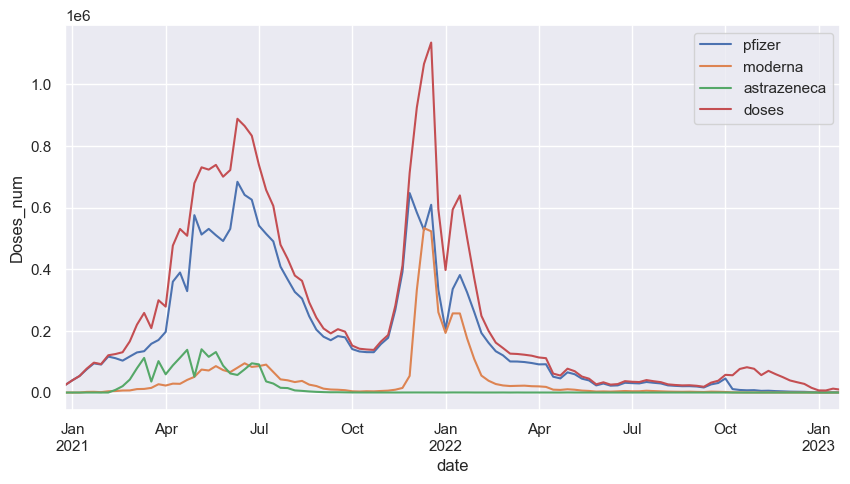

In [147]:
#What is the contribution of each manufacturer?
week_vac=vaccines.resample('W').mean()
week_vac[['pfizer', 'moderna','astrazeneca','doses']].plot(figsize=(10,5), ylabel="Doses_num")
plt.show()
#The most commony used manufacturer in Germany is pfizer
#Looks like there is other manufacturers present

In [148]:
#Does all manufacturers sum to the daily doses number?
#len(vaccines[vaccines['doses']==vaccines['pfizer']+vaccines['moderna']+vaccines['astrazeneca']].index)
print(f"There are only {len(vaccines[(vaccines['doses'] == vaccines['pfizer'] + vaccines['moderna'] + vaccines['astrazeneca'])].index)} days in which all manufacturers sum to the daily doses number")
vaccines[vaccines['doses']==vaccines['pfizer']+vaccines['moderna']+vaccines['astrazeneca'] ].index
#There are other manufacturers not presented in the data

There are only 43 days in which all manufacturers sum to the daily doses number


DatetimeIndex(['2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
               '2020-12-31', '2021-01-03', '2021-01-05', '2021-01-06',
               '2021-01-08', '2021-01-09', '2021-01-11', '2021-01-13',
               '2021-01-14', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-22', '2021-01-23', '2021-01-25', '2021-01-26',
               '2021-01-28', '2021-02-04', '2021-02-09', '2021-02-25',
               '2021-02-26', '2021-03-01', '2021-03-02', '2021-03-04',
               '2021-03-06', '2021-03-07', '2021-03-09', '2021-03-11',
               '2021-03-13', '2021-03-14', '2021-03-15', '2021-03-16',
               '2021-03-18', '2021-03-19', '2021-03-20', '2021-03-22',
               '2021-04-03', '2021-04-05', '2021-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

In [149]:
#create another colum for other manufacturers
vaccines['other']=vaccines['doses']-(vaccines['moderna']+vaccines['astrazeneca']+vaccines['pfizer'])
vaccines

,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul,pfizer,moderna,astrazeneca,other
date,,,,,,,,,,,,
2020-12-27,24427,24427,0,24418,8,1,24427,0,24418.0,8.0,1.0,0.0
2020-12-28,18073,18073,0,42489,9,2,42500,0,18071.0,1.0,1.0,0.0
2020-12-29,50229,50229,0,92717,9,3,92729,0,50228.0,0.0,1.0,0.0
2020-12-30,64213,64213,0,156929,10,3,156942,0,64212.0,1.0,0.0,0.0
2020-12-31,49985,49985,0,206912,12,3,206927,0,49983.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-18,15120,688,312,138014658,31577922,12803023,64866267,63553167,1134.0,41.0,0.0,13945.0
2023-01-19,16594,314,381,138015809,31577955,12803023,64866581,63553548,1151.0,33.0,0.0,15410.0
2023-01-20,10565,334,235,138016521,31578012,12803023,64866915,63553783,712.0,57.0,0.0,9796.0


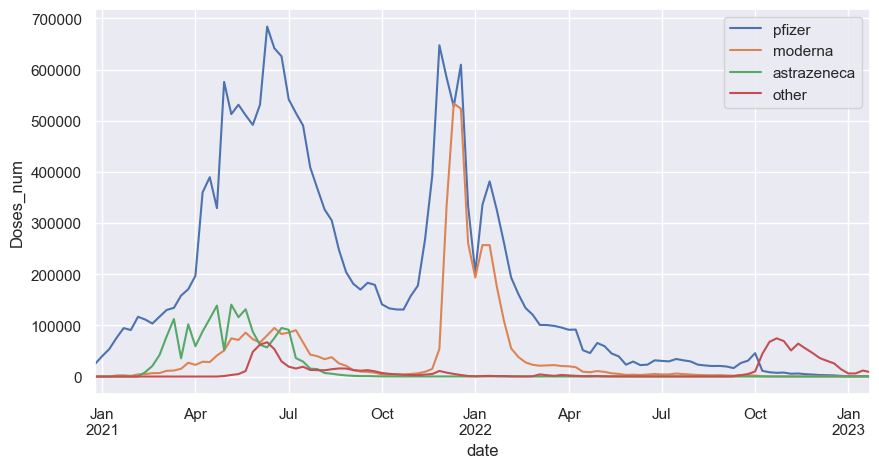

In [150]:
#What is the contribution of each manufacturer (including other manufactorers)?
week_vac=vaccines.resample('W').mean()
week_vac[['pfizer', 'moderna','astrazeneca','other']].plot(figsize=(10,5), ylabel="Doses_num")
plt.show()

In [151]:
#Percentage of each manufacturer
vaccines['pfizer%']=(vaccines['pfizer']/vaccines['doses'])*100
vaccines['moderna%']=(vaccines['moderna']/vaccines['doses'])*100
vaccines['astrazeneca%']=(vaccines['astrazeneca']/vaccines['doses'])*100
vaccines['other%']=(vaccines['other']/vaccines['doses'])*100
print(vaccines.shape)
vaccines.tail(10)
#df[percent] = (df['column_name'] / df['column_name'].sum()) * 100

(757, 16)


,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul,pfizer,moderna,astrazeneca,other,pfizer%,moderna%,astrazeneca%,other%
date,,,,,,,,,,,,,,,,
2023-01-13,17508,371,342,138011328,31577742,12803023,64865053,63552354,1176.0,206.0,1.0,16125.0,6.716929,1.176605,0.005712,92.100754
2023-01-14,2901,63,68,138011559,31577752,12803023,64865116,63552422,231.0,10.0,0.0,2660.0,7.962771,0.344709,0.000000,91.692520
2023-01-15,1536,27,33,138011843,31577843,12803023,64865143,63552455,284.0,91.0,0.0,1161.0,18.489583,5.924479,0.000000,75.585938
2023-01-16,6997,134,148,138012394,31577873,12803023,64865277,63552603,551.0,30.0,0.0,6416.0,7.874803,0.428755,0.000000,91.696441
2023-01-17,14922,302,252,138013524,31577881,12803023,64865579,63552855,1130.0,8.0,0.0,13784.0,7.572711,0.053612,0.000000,92.373676
2023-01-18,15120,688,312,138014658,31577922,12803023,64866267,63553167,1134.0,41.0,0.0,13945.0,7.500000,0.271164,0.000000,92.228836
2023-01-19,16594,314,381,138015809,31577955,12803023,64866581,63553548,1151.0,33.0,0.0,15410.0,6.936242,0.198867,0.000000,92.864891
2023-01-20,10565,334,235,138016521,31578012,12803023,64866915,63553783,712.0,57.0,0.0,9796.0,6.739233,0.539517,0.000000,92.721249
2023-01-21,1395,45,19,138016565,31578013,12803023,64866960,63553802,44.0,1.0,0.0,1350.0,3.154122,0.071685,0.000000,96.774194


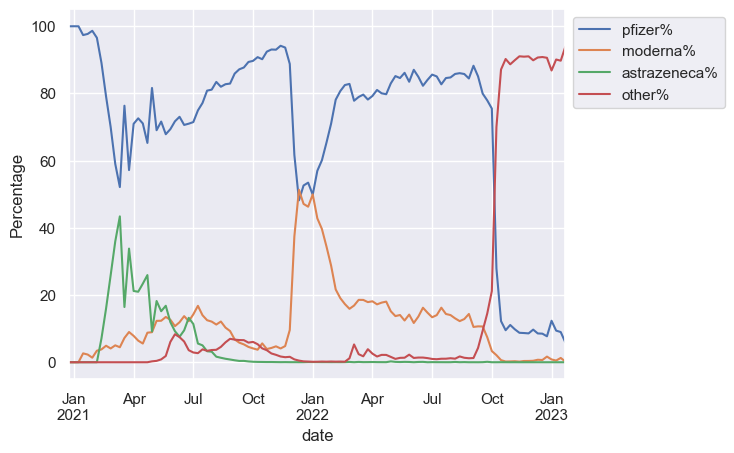

In [152]:
#What is the percentage usege of each manufacturer?
week_vac=vaccines.resample('W').mean()
week_vac[['pfizer%', 'moderna%','astrazeneca%','other%']].plot(ylabel='Percentage')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()
# In Jan 22 it was a reduction in pfizer use that was replaced by moderna
#astrazeneca was mainly used in the begining Feb-Jul 21 and abundunt afterwords. 
#Starting from Sep 2022 there is a shift to other manufacturers.

### Vaccination patterns

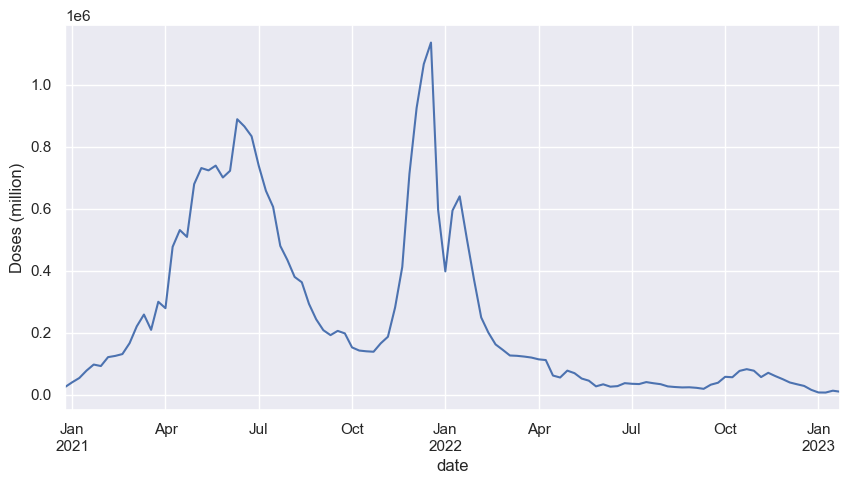

In [153]:
#Vaccination pattern
week_vac['doses'].plot(ylabel="Doses (million)", figsize=(10,5))
plt.show()


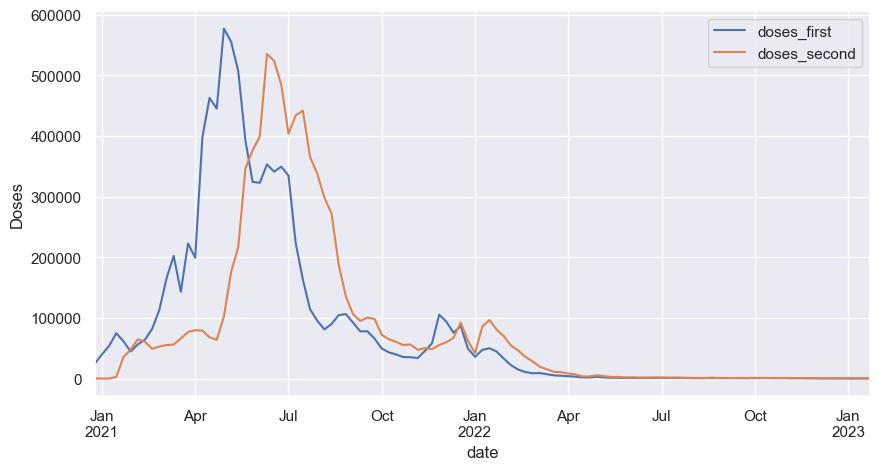

In [154]:
#First vs second dose pattern
week_vac[['doses_first', 'doses_second']].plot(ylabel="Doses", figsize=(10,5))
plt.show()

In [20]:
#when dose1+dose2 ==daily doses?
print(f"There are only {len(vaccines[(vaccines['doses']==vaccines['doses_first']+vaccines['doses_second'])].index)} \
dated in which dose1 +dose2 =total daily doses")

There are only 155 dated in which dose1 +dose2 =total daily doses


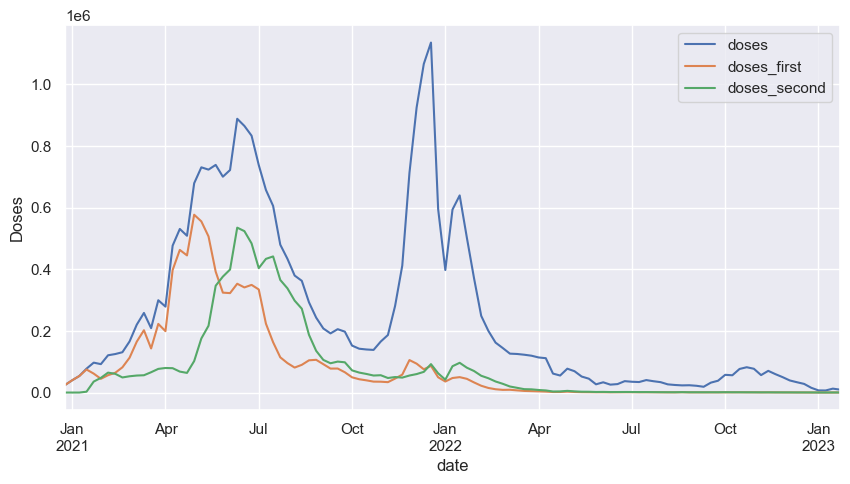

In [155]:
#total doses , first and second shot
week_vac[['doses', 'doses_first', 'doses_second']].plot(ylabel="Doses", figsize=(10,5))
plt.show()
# There is a third dose not presented in the data

In [156]:
#calculate the third dose and add as another column
vaccines['doses_third']=vaccines['doses']-(vaccines['doses_first']+vaccines['doses_second'])
vaccines.head()

,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul,pfizer,moderna,astrazeneca,other,pfizer%,moderna%,astrazeneca%,other%,doses_third
date,,,,,,,,,,,,,,,,,
2020-12-27,24427,24427,0,24418,8,1,24427,0,24418.0,8.0,1.0,0.0,99.963156,0.032751,0.004094,0.0,0
2020-12-28,18073,18073,0,42489,9,2,42500,0,18071.0,1.0,1.0,0.0,99.988934,0.005533,0.005533,0.0,0
2020-12-29,50229,50229,0,92717,9,3,92729,0,50228.0,0.0,1.0,0.0,99.998009,0.000000,0.001991,0.0,0
2020-12-30,64213,64213,0,156929,10,3,156942,0,64212.0,1.0,0.0,0.0,99.998443,0.001557,0.000000,0.0,0
2020-12-31,49985,49985,0,206912,12,3,206927,0,49983.0,2.0,0.0,0.0,99.995999,0.004001,0.000000,0.0,0


In [157]:
#create another column with fully vacinated people ( caculate from cumsum)
vaccines['persons_full']=vaccines['persons_full_cumul'].diff().fillna(vaccines['persons_full_cumul'].iloc[0])
new_cols=['doses', 'doses_first', 'doses_second', 'doses_third','persons_full', 'persons_first_cumul', 'persons_full_cumul',
          'pfizer_cumul', 'moderna_cumul','astrazeneca_cumul', 
       'pfizer', 'moderna', 'astrazeneca', 'other','pfizer%', 'moderna%','astrazeneca%','other%']
vaccines=vaccines.reindex(columns=new_cols)
vaccines.tail(10)
#persons_full= 2 doses of vaccine ( not 3)

,doses,doses_first,doses_second,doses_third,persons_full,persons_first_cumul,persons_full_cumul,pfizer_cumul,moderna_cumul,astrazeneca_cumul,pfizer,moderna,astrazeneca,other,pfizer%,moderna%,astrazeneca%,other%
date,,,,,,,,,,,,,,,,,,
2023-01-13,17508,371,342,16795,342.0,64865053,63552354,138011328,31577742,12803023,1176.0,206.0,1.0,16125.0,6.716929,1.176605,0.005712,92.100754
2023-01-14,2901,63,68,2770,68.0,64865116,63552422,138011559,31577752,12803023,231.0,10.0,0.0,2660.0,7.962771,0.344709,0.000000,91.692520
2023-01-15,1536,27,33,1476,33.0,64865143,63552455,138011843,31577843,12803023,284.0,91.0,0.0,1161.0,18.489583,5.924479,0.000000,75.585938
2023-01-16,6997,134,148,6715,148.0,64865277,63552603,138012394,31577873,12803023,551.0,30.0,0.0,6416.0,7.874803,0.428755,0.000000,91.696441
2023-01-17,14922,302,252,14368,252.0,64865579,63552855,138013524,31577881,12803023,1130.0,8.0,0.0,13784.0,7.572711,0.053612,0.000000,92.373676
2023-01-18,15120,688,312,14120,312.0,64866267,63553167,138014658,31577922,12803023,1134.0,41.0,0.0,13945.0,7.500000,0.271164,0.000000,92.228836
2023-01-19,16594,314,381,15899,381.0,64866581,63553548,138015809,31577955,12803023,1151.0,33.0,0.0,15410.0,6.936242,0.198867,0.000000,92.864891
2023-01-20,10565,334,235,9996,235.0,64866915,63553783,138016521,31578012,12803023,712.0,57.0,0.0,9796.0,6.739233,0.539517,0.000000,92.721249
2023-01-21,1395,45,19,1331,19.0,64866960,63553802,138016565,31578013,12803023,44.0,1.0,0.0,1350.0,3.154122,0.071685,0.000000,96.774194


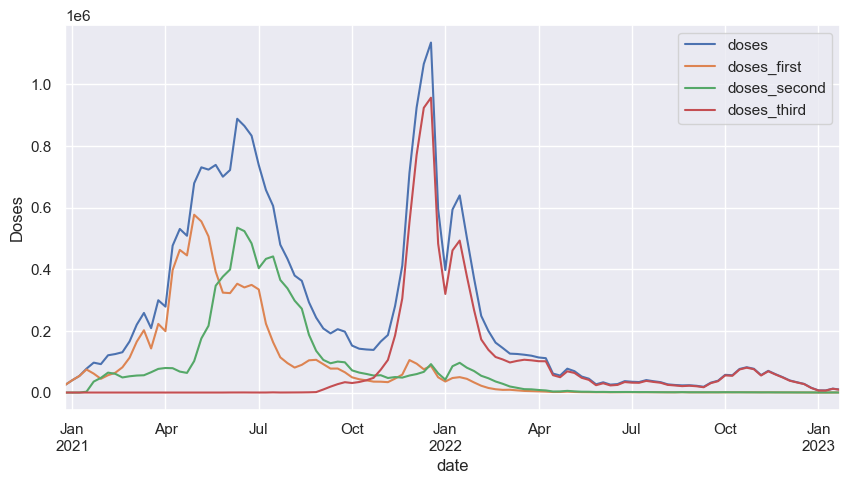

In [158]:
#Present total doses, first, second and third
week_vac=vaccines.resample('W').mean()
week_vac[['doses', 'doses_first', 'doses_second','doses_third']].plot(ylabel="Doses", figsize=(10,5))
plt.show()

In [159]:
#calculate cumsum for third dose
vaccines['persons_third_cumul']=vaccines['doses_third'].cumsum()
vaccines


,doses,doses_first,doses_second,doses_third,persons_full,persons_first_cumul,persons_full_cumul,pfizer_cumul,moderna_cumul,astrazeneca_cumul,pfizer,moderna,astrazeneca,other,pfizer%,moderna%,astrazeneca%,other%,persons_third_cumul
date,,,,,,,,,,,,,,,,,,,
2020-12-27,24427,24427,0,0,0.0,24427,0,24418,8,1,24418.0,8.0,1.0,0.0,99.963156,0.032751,0.004094,0.000000,0
2020-12-28,18073,18073,0,0,0.0,42500,0,42489,9,2,18071.0,1.0,1.0,0.0,99.988934,0.005533,0.005533,0.000000,0
2020-12-29,50229,50229,0,0,0.0,92729,0,92717,9,3,50228.0,0.0,1.0,0.0,99.998009,0.000000,0.001991,0.000000,0
2020-12-30,64213,64213,0,0,0.0,156942,0,156929,10,3,64212.0,1.0,0.0,0.0,99.998443,0.001557,0.000000,0.000000,0
2020-12-31,49985,49985,0,0,0.0,206927,0,206912,12,3,49983.0,2.0,0.0,0.0,99.995999,0.004001,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-18,15120,688,312,14120,312.0,64866267,63553167,138014658,31577922,12803023,1134.0,41.0,0.0,13945.0,7.500000,0.271164,0.000000,92.228836,64544143
2023-01-19,16594,314,381,15899,381.0,64866581,63553548,138015809,31577955,12803023,1151.0,33.0,0.0,15410.0,6.936242,0.198867,0.000000,92.864891,64560042
2023-01-20,10565,334,235,9996,235.0,64866915,63553783,138016521,31578012,12803023,712.0,57.0,0.0,9796.0,6.739233,0.539517,0.000000,92.721249,64570038


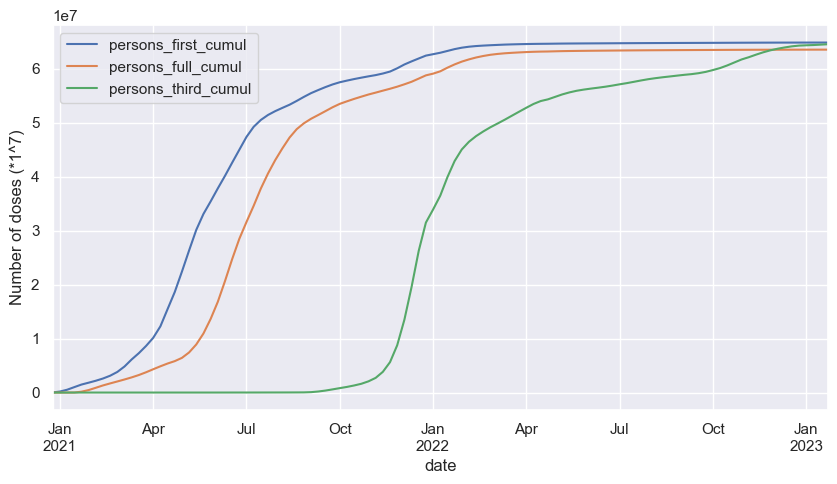

In [160]:
#What is the percentage of total population is vaccinated?
week_vac=vaccines.resample('W').mean()
week_vac[['persons_first_cumul', 'persons_full_cumul','persons_third_cumul']].plot(ylabel="Number of doses (*1^7)", figsize=(10,5))
plt.show()

In [161]:
#Total population in Germany
print(demo['population'].sum())
#calculate % of vaccinated with first, second, third dose out of total population
vaccines['first_dose%']=(vaccines['persons_first_cumul']/demo['population'].sum())*100
vaccines['second_dose%']=(vaccines['persons_full_cumul']/demo['population'].sum())*100
vaccines['third_dose%']=(vaccines['persons_third_cumul']/demo['population'].sum())*100
vaccines.head()


83019213


,doses,doses_first,doses_second,doses_third,persons_full,persons_first_cumul,persons_full_cumul,pfizer_cumul,moderna_cumul,astrazeneca_cumul,...,astrazeneca,other,pfizer%,moderna%,astrazeneca%,other%,persons_third_cumul,first_dose%,second_dose%,third_dose%
date,,,,,,,,,,,,,,,,,,,,,
2020-12-27,24427,24427,0,0,0.0,24427,0,24418,8,1,...,1.0,0.0,99.963156,0.032751,0.004094,0.0,0,0.029423,0.0,0.0
2020-12-28,18073,18073,0,0,0.0,42500,0,42489,9,2,...,1.0,0.0,99.988934,0.005533,0.005533,0.0,0,0.051193,0.0,0.0
2020-12-29,50229,50229,0,0,0.0,92729,0,92717,9,3,...,1.0,0.0,99.998009,0.000000,0.001991,0.0,0,0.111696,0.0,0.0
2020-12-30,64213,64213,0,0,0.0,156942,0,156929,10,3,...,0.0,0.0,99.998443,0.001557,0.000000,0.0,0,0.189043,0.0,0.0
2020-12-31,49985,49985,0,0,0.0,206927,0,206912,12,3,...,0.0,0.0,99.995999,0.004001,0.000000,0.0,0,0.249252,0.0,0.0


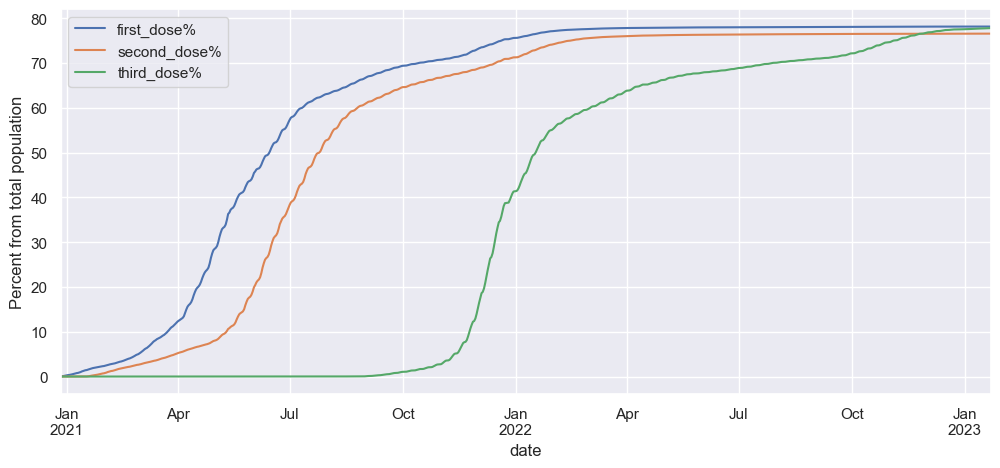

In [162]:
#The percentage of total population is vaccinated?
vaccines[['first_dose%','second_dose%','third_dose%']].plot(ylabel="Percent from total population", figsize=(12,5))
plt.show()

## Effect of vaccination on number of cases and deaths

In [144]:
covid

,state,county,age_group,gender,cases,deaths,recovered
date,,,,,,,
2020-03-27,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-03-28,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-04-03,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-10-18,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-10-22,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
...,...,...,...,...,...,...,...
2021-12-23,Thueringen,SK Weimar,NaN,F,1,0,1
2022-08-11,Thueringen,SK Weimar,NaN,F,1,0,1
2022-09-19,Thueringen,SK Weimar,NaN,F,1,0,1


In [163]:
#Add cumulative colums
covid['recovered_cum']=covid['recovered'].cumsum()
covid['cases_cum']=covid['cases'].cumsum()
covid['deaths_cum']=covid['deaths'].cumsum()
covid

,state,county,age_group,gender,cases,deaths,recovered,recovered_cum,cases_cum,deaths_cum
date,,,,,,,,,,
2020-03-27,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1,1,1,0
2020-03-28,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1,2,2,0
2020-04-03,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1,3,3,0
2020-10-18,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1,4,4,0
2020-10-22,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1,5,5,0
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,Thueringen,SK Weimar,NaN,F,1,0,1,36420064,37211947,160768
2022-08-11,Thueringen,SK Weimar,NaN,F,1,0,1,36420065,37211948,160768
2022-09-19,Thueringen,SK Weimar,NaN,F,1,0,1,36420066,37211949,160768


<AxesSubplot:xlabel='date'>

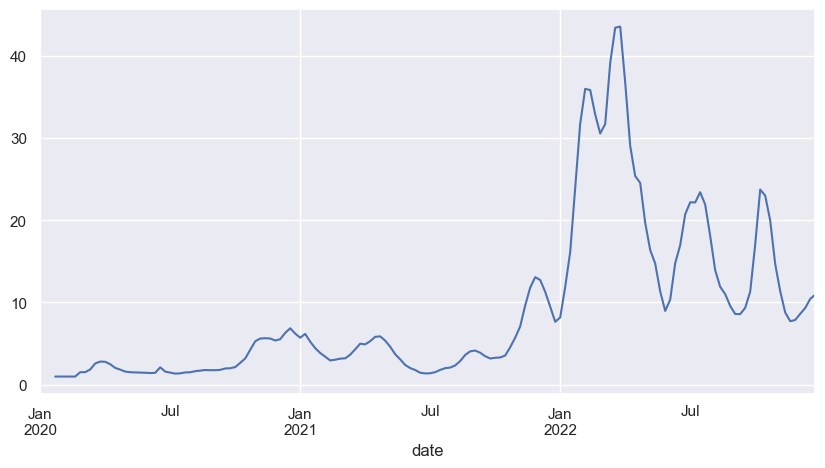

In [164]:

week_covid=covid.resample('W').mean()
week_covid['cases'].plot(figsize=(10,5))

In [165]:
covid_vaccines = covid.join(vaccines, how = 'left') 
print(covid_vaccines.shape)
covid_vaccines.sample(3)

(2790555, 32)


,state,county,age_group,gender,cases,deaths,recovered,recovered_cum,cases_cum,deaths_cum,...,astrazeneca,other,pfizer%,moderna%,astrazeneca%,other%,persons_third_cumul,first_dose%,second_dose%,third_dose%
date,,,,,,,,,,,,,,,,,,,,,
2020-04-29,Nordrhein-Westfalen,LK Steinfurt,60-79,F,1,1,0,25650408,26178962,102511,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-23,Nordrhein-Westfalen,SK Solingen,05-14,F,2,0,2,29028080,29643949,116096,...,0.0,69782.0,7.586225,0.058233,0.000000,92.355541,63378907.0,78.115891,76.532025,76.342457
2021-09-06,Brandenburg,LK Potsdam-Mittelmark,35-59,F,4,0,4,13375353,13584570,54845,...,1102.0,9277.0,86.866322,6.364662,0.718707,6.050309,121443.0,67.190124,61.530913,0.146283


In [166]:
covid_vaccines.columns

Index(['state', 'county', 'age_group', 'gender', 'cases', 'deaths',
       'recovered', 'recovered_cum', 'cases_cum', 'deaths_cum', 'doses',
       'doses_first', 'doses_second', 'doses_third', 'persons_full',
       'persons_first_cumul', 'persons_full_cumul', 'pfizer_cumul',
       'moderna_cumul', 'astrazeneca_cumul', 'pfizer', 'moderna',
       'astrazeneca', 'other', 'pfizer%', 'moderna%', 'astrazeneca%', 'other%',
       'persons_third_cumul', 'first_dose%', 'second_dose%', 'third_dose%'],
      dtype='object')

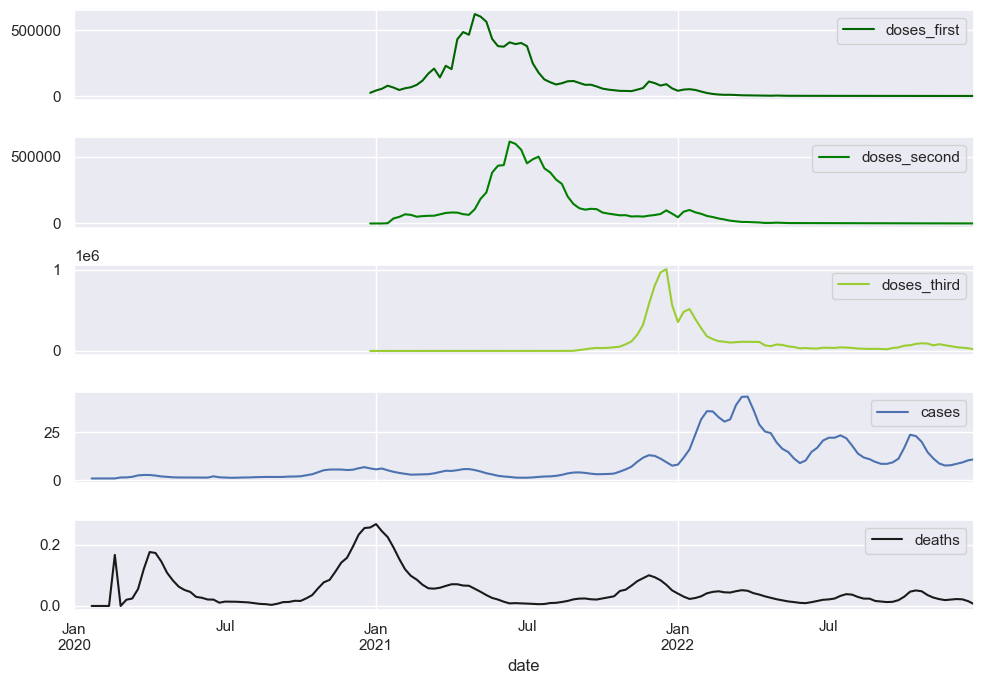

In [167]:
# create subplots to visualise vaccination doses with cases and deaths ( same x axis)

week_vac_cases=covid_vaccines.resample('W').mean() # resize to weeks to have better graphic presentation

fig, axes = plt.subplots(nrows=5, ncols=1, sharex=True,figsize=(10,7))
week_vac_cases['doses_first'].plot(ax=axes[0],legend='first_dose', color='darkgreen' )
week_vac_cases['doses_second'].plot(ax=axes[1],legend='second_dose',color='green' )
week_vac_cases['doses_third'].plot(ax=axes[2],legend='third_dose', color='yellowgreen' )
week_vac_cases['cases'].plot(ax=axes[3], legend='cases')
week_vac_cases['deaths'].plot(ax=axes[4],legend='deaths',color='k')
fig.tight_layout()


In [75]:
# the date then 60%  were vaccinated with first dose

print(vaccines.index[vaccines['first_dose%'].searchsorted(60)])
# the date then 50%  were vaccinated with first dose
print(vaccines.index[vaccines['first_dose%'].searchsorted(50)])
# the date then 60%  were vaccinated with second dose
print(vaccines.index[vaccines['second_dose%'].searchsorted(60)])

# the date then 60%  were vaccinated with third dose
print(vaccines.index[vaccines['third_dose%'].searchsorted(60)])


2021-07-12 00:00:00
2021-06-15 00:00:00
2021-08-26 00:00:00
2022-03-03 00:00:00


#### What is the death ratio before the begining of vaccination ?

In [44]:
#Calculate the death ratio before 50% of population were vaccinated
deaths0b=covid.loc[:'2020-12-27 00:00:00' ]['deaths'].sum() 
cases0b=covid.loc[:'2020-12-27 00:00:00' ]['cases'].sum()
print ( f'Number of deaths before  vaccination are {deaths0b} and number of cases are {cases0b}')

death_percent_b0=deaths0b/cases0b *100
print( f'percent of deaths before the begining of vaccination {death_percent_b0}')



Number of deaths before  vaccination are 46966 and number of cases are 1660161
percent of deaths before the begining of vaccination 2.8290027292533675
percent of recovered before the begining of vaccination 97.17081656538132


#### Count the percentage of deaths before and after first dose of vaccination (60% of population)

In [60]:

#before first dose
deaths1b=covid.loc[:'2021-07-12 00:00:00' ]['deaths'].sum() 
cases1b=covid.loc[:'2021-07-12 00:00:00' ]['cases'].sum()
print ( f'Number of deaths before 60% were vaccinated with first dose is {deaths1b} and number of cases is {cases1b}')

death_percent_b=deaths1b/cases1b *100
print( f'percent of deaths before 60% were vaccinated with first dose is {death_percent_b}')

#after first dose
deaths1a=covid.loc['2021-07-12 00:00:00' :]['deaths'].sum() 
cases1a=covid.loc['2021-07-12 00:00:00' :]['cases'].sum()
print ( f'\n Number of deaths after 60% were vaccinated with first dose is {deaths1a}and number of cases is {cases1a}')

death_percent_a=deaths1a/cases1a *100
print( f'percent of deaths before 60% were vaccinated with first dose is {death_percent_a}')

#There is a great decrease in death % out of all cases following first dose of vaccination from 2.5% to 0.21%

Number of deaths before 60% were vaccinated with first dose is 92815 and number of cases is 3735491
percent of deaths before 60% were vaccinated with first dose is 2.4846800594620624

 Number of deaths after 60% were vaccinated with first dose is 73205and number of cases is 34074936
percent of deaths before 60% were vaccinated with first dose is 0.21483532646987216


IndexError: index 2 is out of bounds for axis 0 with size 2

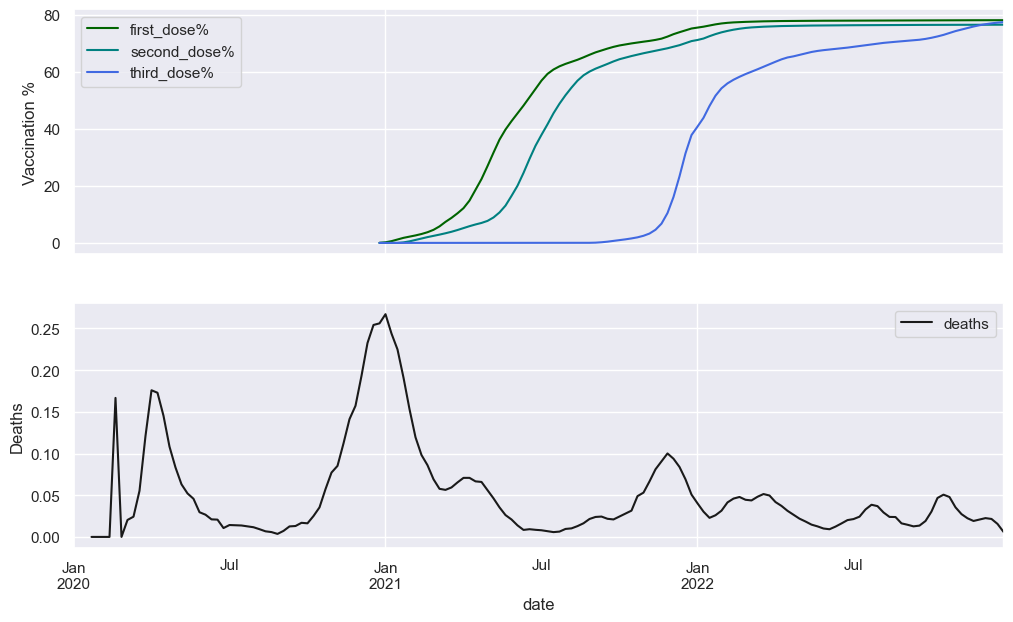

In [177]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(12,7))
week_vac_cases[['first_dose%','second_dose%','third_dose%']].plot(ax=axes[0],legend='first_dose%', color=['darkgreen', 'teal','royalblue'] )
week_vac_cases['deaths'].plot(ax=axes[1],legend='deaths',color='k')
#week_vac_cases['cases'].plot(ax=axes[2],legend='deaths',color='b')

# Set y-label for the first subplot
axes[0].set_ylabel('Vaccination %')

# Set y-label for the second subplot
axes[1].set_ylabel('Deaths')
axes[2].set_ylabel('Cases (million)')
#ax.set_ylable('Percentage of vaccinated with 1st dose')
plt.show()

#### Count the percentage of deaths from the begining of vaccination vs after 60% of population  got their third dose of vaccination

In [172]:


#from begining of vaccination - 60% vaccinated with 3rd dose
deaths3b = covid.loc['2020-12-27 00:00:00':'2022-03-03 00:00:00', 'deaths'].sum()
cases3b=covid.loc['2020-12-27 00:00:00':'2022-03-03 00:00:00', 'cases'].sum()
print ( f'Number of deaths from begining of vaccination untill 60% were vaccinated with third dose are {deaths3b} and number of cases is {cases3b}')

death_percent_b3=deaths3b/cases3b *100
print( f'percent of deaths from begining of vaccination untill 60% were vaccinated with third dose are {death_percent_b3}')

#after first dose
deaths3a=covid.loc['2022-03-03 00:00:00' :]['deaths'].sum() 
cases3a=covid.loc['2022-03-03 00:00:00' :]['cases'].sum()
print ( f'\n Number of deaths after 60% were vaccinated with third dose are {deaths3a}and number of cases are {cases3a}')

death_percent_a3=deaths3a/cases3a *100
print( f'percent of deaths before 60% were vaccinated with third dose are {death_percent_a3}')

#There is a great decrease in death % out of all cases following third dose of vaccination from 0.6% to 0.16%

Number of deaths from begining of vaccination untill 60% were vaccinated with third dose are 83213 and number of cases is 13935091
percent of deaths from begining of vaccination untill 60% were vaccinated with third dose are 0.5971471589241865

 Number of deaths after 60% were vaccinated with third dose are 31396and number of cases are 21839014
percent of deaths before 60% were vaccinated with third dose are 0.14376106906657965


In [173]:
#create df from begining of vaccination
vaccination_start=covid_vaccines.loc['2020-12-27 00:00:00':]
vaccination_start_weeks=vaccination_start.resample('W').mean() # resize by weeks for better visualization


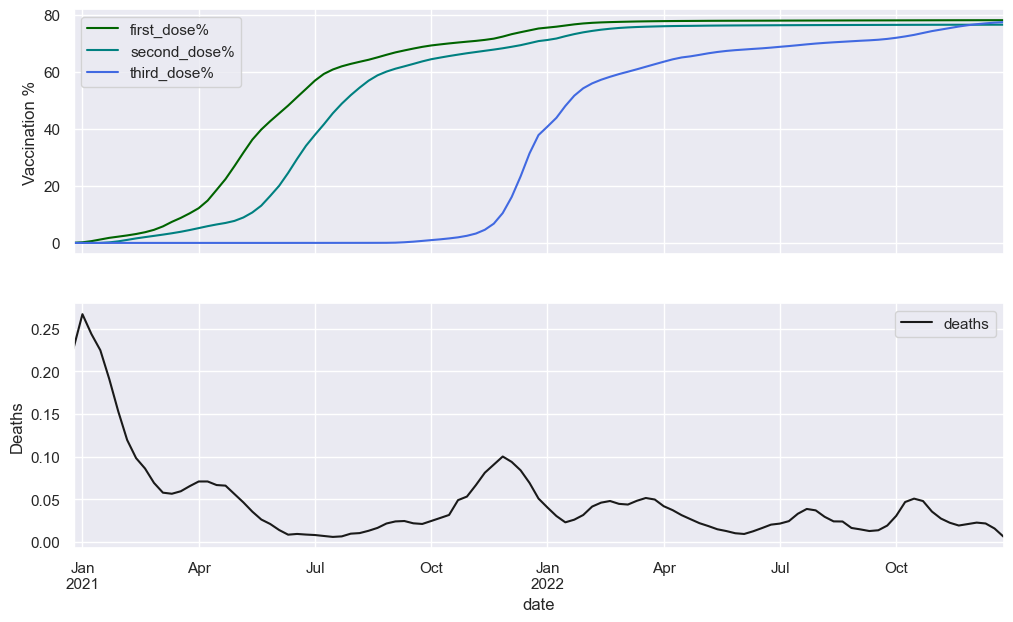

In [179]:
#visualize deaths in parralel with vaccination

fig, axes = plt.subplots(nrows=2,  sharex=True,figsize=(12,7))
vaccination_start_weeks[['first_dose%','second_dose%','third_dose%']].plot(ax=axes[0],legend='first_dose%', color=['darkgreen', 'teal','royalblue'] )
vaccination_start_weeks['deaths'].plot(ax=axes[1],legend='deaths',color='k')
#vaccination_start_weeks['cases'].plot(ax=axes[2],legend='deaths',color='b')

# Set y-label for the first subplot
axes[0].set_ylabel('Vaccination %')

# Set y-label for the second subplot
axes[1].set_ylabel('Deaths')
#axes[2].set_ylabel('Cases')
#ax.set_ylable('Percentage of vaccinated with 1st dose')
plt.show()

#### Does the 3rd dose of vaccination had beneficial effect on death rates or two doses were enough?

In [175]:
#create df from 60% vaccination with second dose 
vaccination_second=covid_vaccines.loc['2021-08-26 00:00:00':]
vaccination_second_weeks=vaccination_second.resample('W').mean() # resize by weeks for better visualization


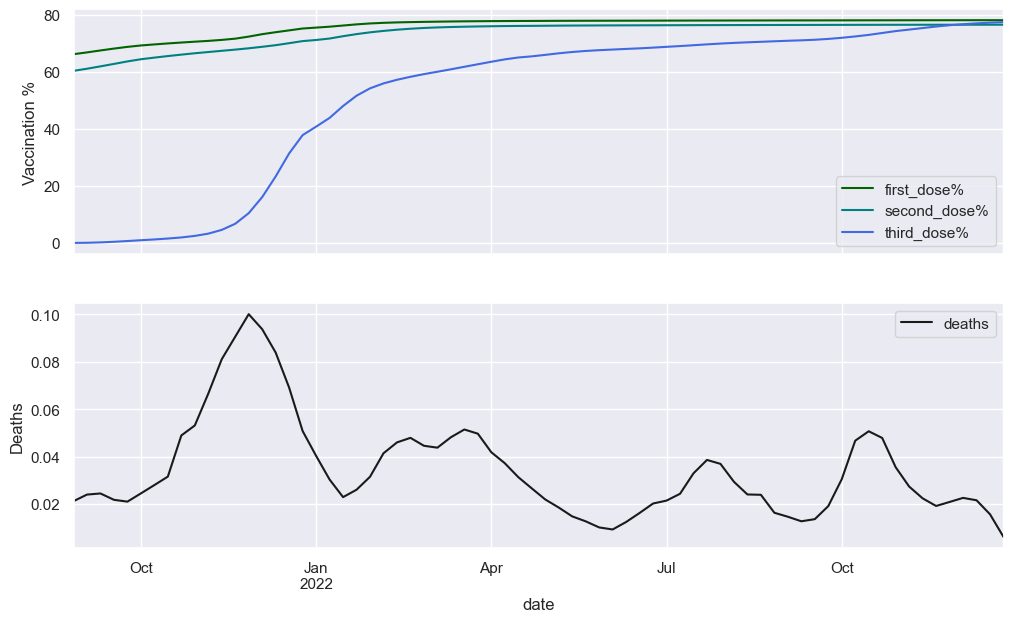

In [180]:
#visualize deaths in parralel with vaccination

fig, axes = plt.subplots(nrows=2,  sharex=True,figsize=(12,7))
vaccination_second_weeks[['first_dose%','second_dose%','third_dose%']].plot(ax=axes[0],legend='first_dose%', color=['darkgreen', 'teal','royalblue'] )
vaccination_second_weeks['deaths'].plot(ax=axes[1],legend='deaths',color='k')
#vaccination_second_weeks['cases'].plot(ax=axes[2],legend='deaths',color='b')

# Set y-label for the first subplot
axes[0].set_ylabel('Vaccination %')

# Set y-label for the second subplot
axes[1].set_ylabel('Deaths')
#axes[2].set_ylabel('Cases')
#ax.set_ylable('Percentage of vaccinated with 1st dose')
plt.show()

In [65]:


#from 60% second dose - 60% vaccinated with 3rd dose
deaths2b = vaccination_second.loc[:'2022-03-03 00:00:00', 'deaths'].sum()
cases2b=vaccination_second.loc[:'2022-03-03 00:00:00', 'cases'].sum()
print ( f'Number of deaths between 60% of second and third dose are {deaths2b} and number of cases are {cases2b}')

death_percent_b2=deaths2b/cases2b *100
print( f'percent of deaths between 60% of second and third dose are{death_percent_b2}')

#after third dose
deaths2a=covid.loc['2022-03-03 00:00:00' :]['deaths'].sum() 
cases2a=covid.loc['2022-03-03 00:00:00' :]['cases'].sum()
print ( f'\n Number of deaths after 60% were vaccinated with third dose is {deaths2a}and number of cases is {cases2a}')

death_percent_a2=deaths2a/cases2a *100
print( f'percent of deaths before 60% were vaccinated with third dose is {death_percent_a2}')

#There is a beneficcial effect of the third vaccine on death rates compared to 2 doses. 
#Atfer 2 doses death rates are 0.99% after 3 doses it decresed to 0.2%

Number of deaths between 60% of second and third dose are 36162 and number of cases are 11680939
percent of deaths between 60% of second and third dose are0.3095812759573524

 Number of deaths after 60% were vaccinated with third dose is 36557and number of cases is 22435231
percent of deaths before 60% were vaccinated with third dose is 0.16294461153531248


### Test alernative explanation - natural immunization  due to recovery.

#### What is the percentage of recovery in population

In [48]:
#Add percentage of population columns ( from total population in Germany)
total_population=demo['population'].sum()
def percent (part_of_population):
    return (part_of_population/total_population)*100
covid['cases%']=covid.apply(lambda x: percent(x['cases']),axis=1)
covid['deaths%']=covid.apply(lambda x: percent(x['deaths']),axis=1)
covid['recovered%']=covid.apply(lambda x: percent(x['recovered']),axis=1)
covid

,state,county,age_group,gender,cases,deaths,recovered,cases%,deaths%,recovered%
date,,,,,,,,,,
2020-03-27,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1,0.000001,0.0,0.000001
2020-03-28,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1,0.000001,0.0,0.000001
2020-04-03,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1,0.000001,0.0,0.000001
2020-10-18,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1,0.000001,0.0,0.000001
2020-10-22,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1,0.000001,0.0,0.000001
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,Thueringen,SK Weimar,NaN,F,1,0,1,0.000001,0.0,0.000001
2022-08-11,Thueringen,SK Weimar,NaN,F,1,0,1,0.000001,0.0,0.000001
2022-09-19,Thueringen,SK Weimar,NaN,F,1,0,1,0.000001,0.0,0.000001


In [55]:
#calculate the recovery percentage
# calculate the percentage of recovered before start of vaccination 
recovered0num=covid.loc[:'2020-12-27 00:00:00' ]['recovered%'].sum()
print( f'percent of recovered before the begining of vaccination {recovered0num}')

# calculate the percentage of recovered then 50% were vaccinated with 1st dose 
recovered1num=covid.loc[:'2021-06-15 00:00:00' ]['recovered%'].sum()
print( f'percent of recovered  then 50% were vaccinated with 1st dose  {recovered1num}')

# calculate the percentage of recovered then 60% were vaccinated with 1st dose 
recovered11num=covid.loc[:'2021-07-12 00:00:00' ]['recovered%'].sum()
print( f'percent of recovered  then 60% were vaccinated with 1st dose  {recovered11num}')

# calculate the percentage of recovered then 60% were vaccinated with 2nd dose 
recovered2num=covid.loc[:'2021-08-26 00:00:00' ]['recovered%'].sum()
print( f'percent of recovered  then 60% were vaccinated with 2nd dose  {recovered2num}')


# calculate the percentage of recovered then 60% were vaccinated with 3rd dose 
recovered2num=covid.loc[:'2022-03-03 00:00:00' ]['recovered%'].sum()
print( f'percent of recovered  then 60% were vaccinated with 3rd dose  {recovered2num}')


percent of recovered before the begining of vaccination 1.943155014008625
percent of recovered  then 50% were vaccinated with 1st dose  4.363523658071776
percent of recovered  then 60% were vaccinated with 1st dose  4.387838511550331
percent of recovered  then 60% were vaccinated with 2nd dose  4.606625215779867
percent of recovered  then 60% were vaccinated with 3rd dose  18.616860412781794


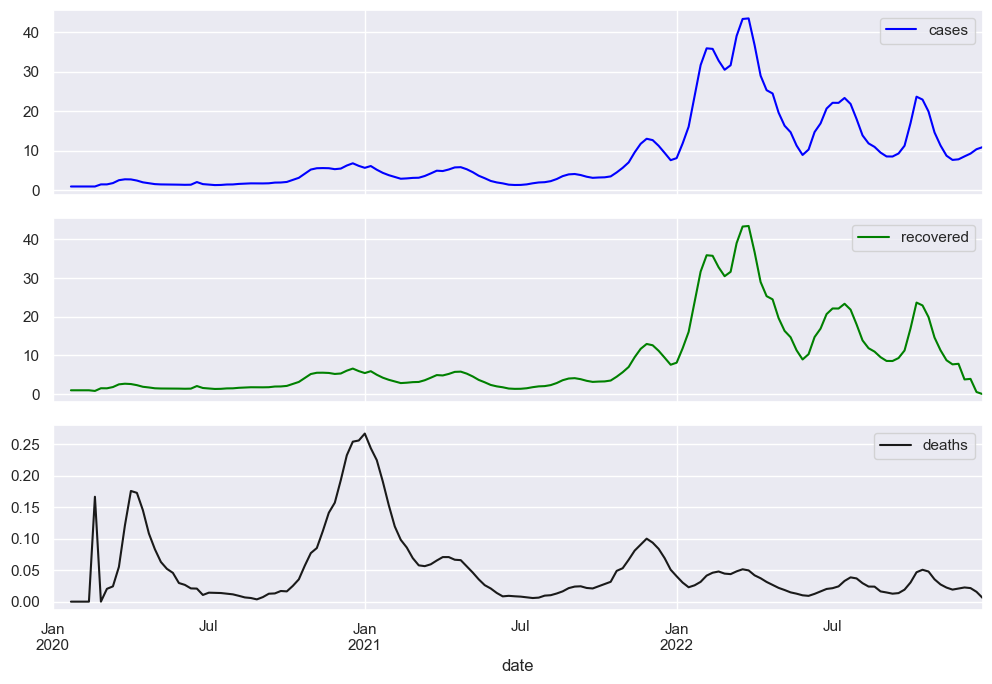

In [97]:
# create subplots to visualise recovery cases and deaths ( same x axis)



fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True,figsize=(10,7))
week_vac_cases['cases'].plot(ax=axes[0],legend='cases', color='blue' )
week_vac_cases['recovered'].plot(ax=axes[1],legend='recoved',color='green' )
week_vac_cases['deaths'].plot(ax=axes[2],legend='death', color='k' )

fig.tight_layout()


The recovery ratios are too low to explain the reduction in death rates

#### Are certain age groups more susceptible to infection and /or death?

In [98]:
covid

,state,county,age_group,gender,cases,deaths,recovered,cases%,deaths%,recovered%,recovered_cum,cases_cum,deaths_cum
date,,,,,,,,,,,,,
2020-03-27,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1,0.000001,0.0,0.000001,1,1,0
2020-03-28,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1,0.000001,0.0,0.000001,2,2,0
2020-04-03,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1,0.000001,0.0,0.000001,3,3,0
2020-10-18,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1,0.000001,0.0,0.000001,4,4,0
2020-10-22,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1,0.000001,0.0,0.000001,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,Thueringen,SK Weimar,NaN,F,1,0,1,0.000001,0.0,0.000001,36420064,37211947,160768
2022-08-11,Thueringen,SK Weimar,NaN,F,1,0,1,0.000001,0.0,0.000001,36420065,37211948,160768
2022-09-19,Thueringen,SK Weimar,NaN,F,1,0,1,0.000001,0.0,0.000001,36420066,37211949,160768


In [101]:
age=covid.groupby('age_group')[["cases","deaths"]].sum()

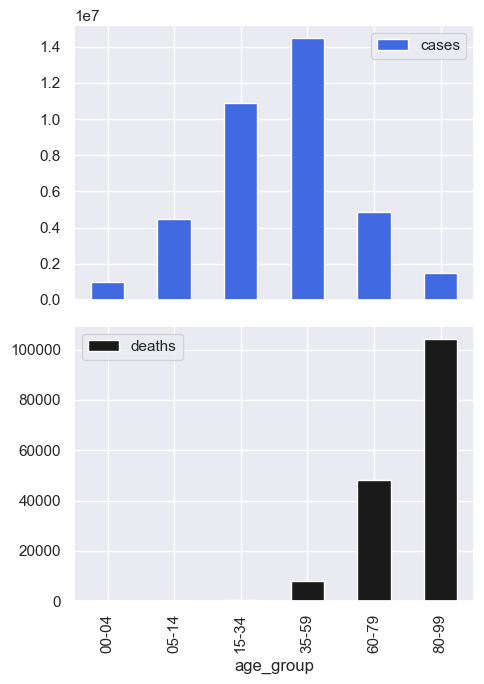

In [106]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(5,7))
age['cases'].plot.bar(ax=axes[0],legend='cases', color='royalblue' )
age['deaths'].plot.bar(ax=axes[1],legend='death',color='k' )


fig.tight_layout()

In [ ]:
#Older people diy more from COVID . The older they are the higher are the chance to die
#Young adults and mature people (15-59) are infected more then children or old people.

#### There are 3 states with most population,  cases and deaths. What happens in counties of each of them

In [100]:
covid

,state,county,age_group,gender,cases,deaths,recovered
date,,,,,,,
2020-03-27,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-03-28,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-04-03,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-10-18,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-10-22,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
...,...,...,...,...,...,...,...
2021-12-23,Thueringen,SK Weimar,NaN,F,1,0,1
2022-08-11,Thueringen,SK Weimar,NaN,F,1,0,1
2022-09-19,Thueringen,SK Weimar,NaN,F,1,0,1


In [102]:
#states names
covid['state'].unique()

array(['Baden-Wuerttemberg', 'Bayern', 'Berlin', 'Brandenburg', 'Bremen',
       'Hamburg', 'Hessen', 'Mecklenburg-Vorpommern', 'Niedersachsen',
       'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Saarland', 'Sachsen',
       'Sachsen-Anhalt', 'Schleswig-Holstein', 'Thueringen'], dtype=object)

In [104]:
# slice out the most populated
MostPopulated=['Baden-Wuerttemberg', 'Bayern','Nordrhein-Westfalen']
MostPopulatedDF=covid[covid['state'].isin(MostPopulated)]
MostPopulatedDF

,state,county,age_group,gender,cases,deaths,recovered
date,,,,,,,
2020-03-27,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-03-28,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-04-03,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-10-18,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-10-22,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
...,...,...,...,...,...,...,...
2022-04-04,Nordrhein-Westfalen,StaedteRegion Aachen,NaN,F,1,0,1
2022-04-20,Nordrhein-Westfalen,StaedteRegion Aachen,NaN,F,1,0,1
2022-01-26,Nordrhein-Westfalen,StaedteRegion Aachen,NaN,M,1,0,1


In [110]:
#group by state and county
CovidBycounty=MostPopulatedDF.groupby(['state','county']).sum()

CovidBycounty

cases  deaths  recovered
state               county                                                
Baden-Wuerttemberg  LK Alb-Donau-Kreis            89267     297      88101
                    LK Biberach                   97413     331      96381
                    LK Bodenseekreis              91084     386      89808
                    LK Boeblingen                180654     529     177365
                    LK Breisgau-Hochschwarzwald  114390     389     112053
...                                                 ...     ...        ...
Nordrhein-Westfalen SK Oberhausen                 72848     519      71083
                    SK Remscheid                  50593     301      48288
                    SK Solingen                   80309     364      78428
                    SK Wuppertal                 164296     724     159213
                    StaedteRegion Aachen         246520    1003     240726

[193 rows x 3 columns]

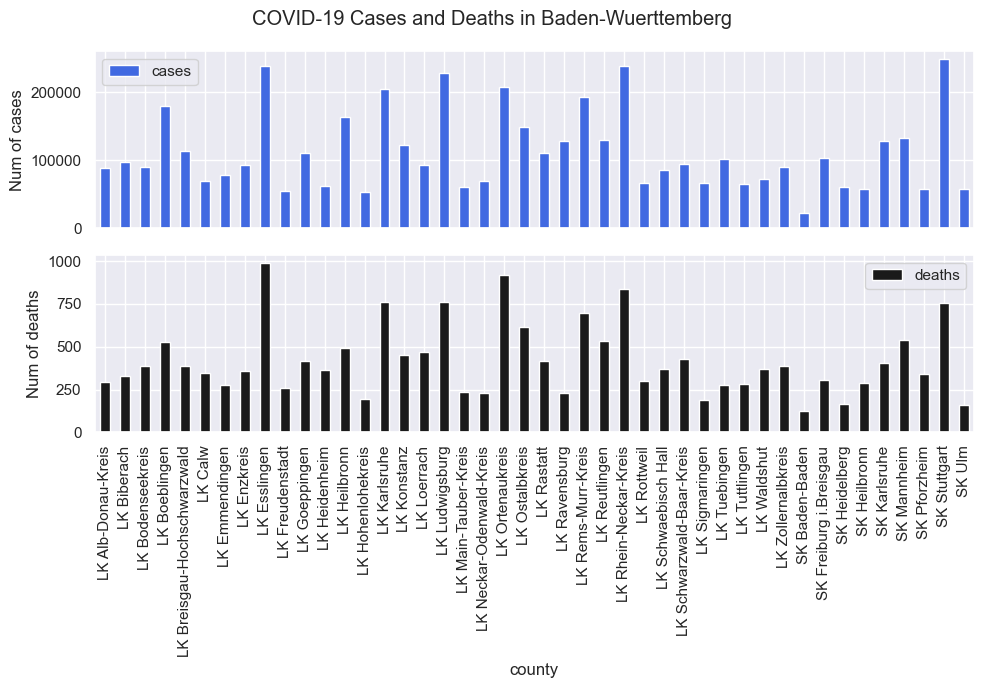

In [128]:
#Breake to 3 df by state

BadenWuerttemberg = CovidBycounty.loc['Baden-Wuerttemberg']


fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(10,7))
BadenWuerttemberg['cases'].plot.bar(ax=axes[0],legend='cases', color='royalblue' )
axes[0].set_ylabel('Num of cases')
BadenWuerttemberg['deaths'].plot.bar(ax=axes[1],legend='death',color='k' )
axes[1].set_ylabel('Num of deaths')
fig.suptitle('COVID-19 Cases and Deaths in Baden-Wuerttemberg')
fig.tight_layout()

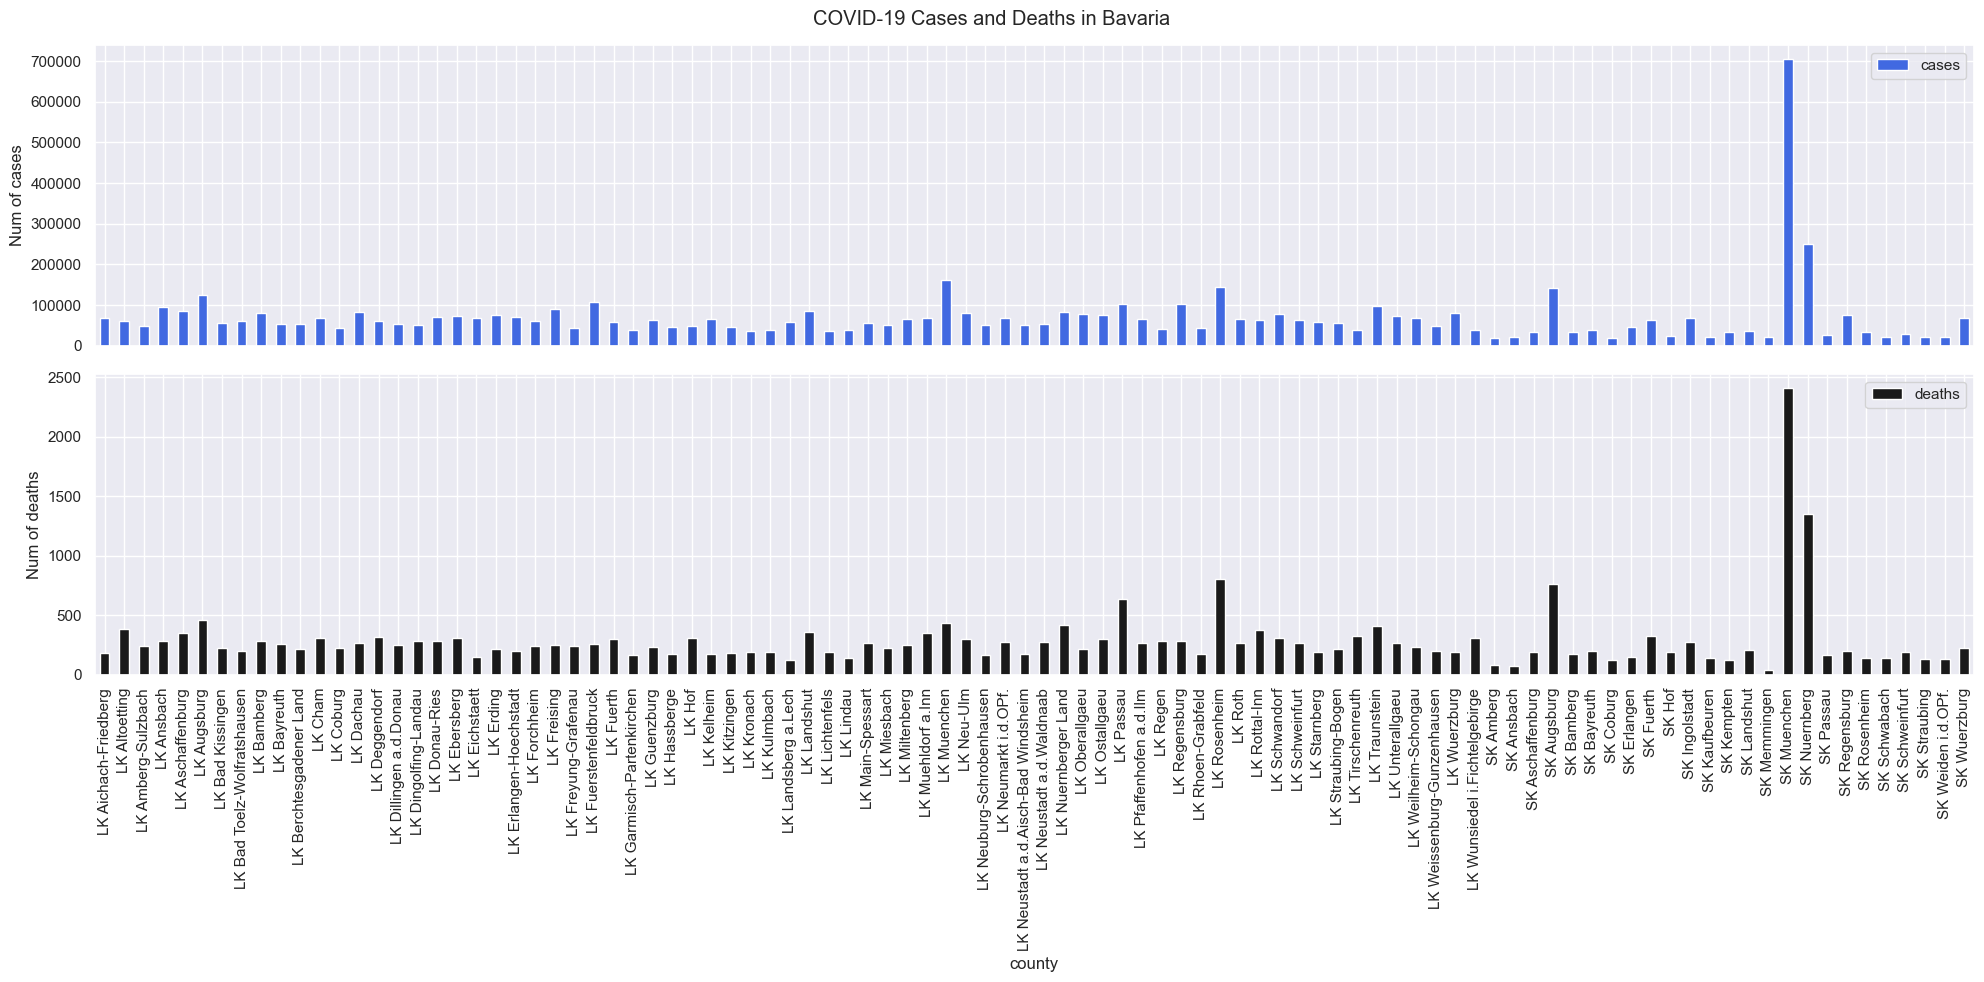

In [129]:
Bayern = CovidBycounty.loc['Bayern']

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(20,10))
Bayern['cases'].plot.bar(ax=axes[0],legend='cases', color='royalblue' )
axes[0].set_ylabel('Num of cases')
Bayern['deaths'].plot.bar(ax=axes[1],legend='death',color='k' )
axes[1].set_ylabel('Num of deaths')
fig.suptitle('COVID-19 Cases and Deaths in Bavaria')
fig.tight_layout()

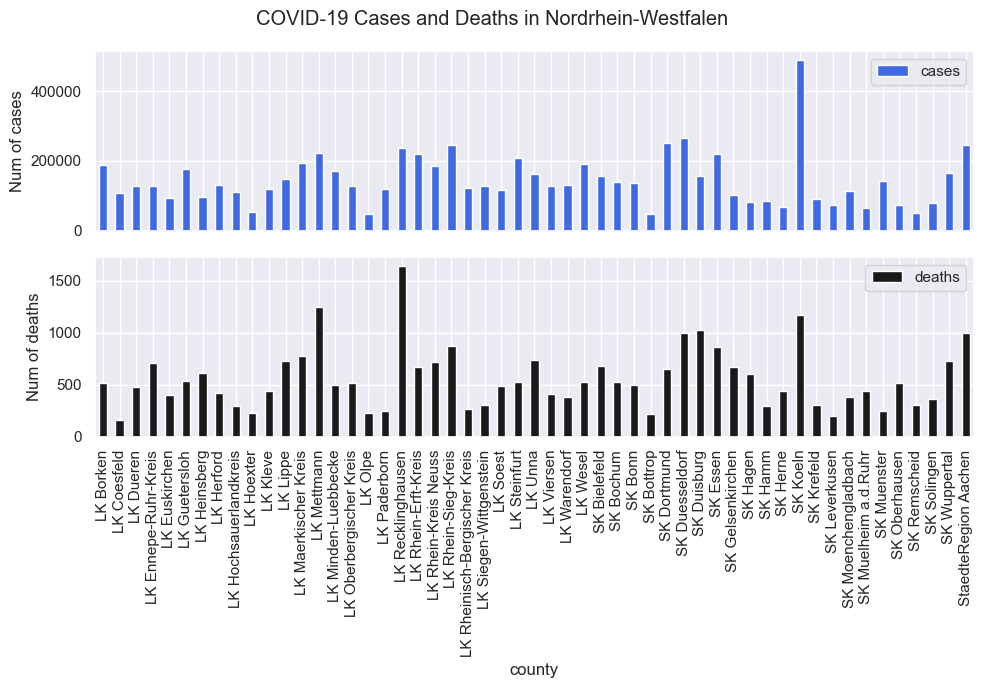

In [130]:
NordrheinWestfalen = CovidBycounty.loc['Nordrhein-Westfalen']

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(10,7))
NordrheinWestfalen['cases'].plot.bar(ax=axes[0],legend='cases', color='royalblue' )
axes[0].set_ylabel('Num of cases')
NordrheinWestfalen['deaths'].plot.bar(ax=axes[1],legend='death',color='k' )
axes[1].set_ylabel('Num of deaths')
fig.suptitle('COVID-19 Cases and Deaths in Nordrhein-Westfalen')
fig.tight_layout()

#### sort the counties to see the ones with most cases

In [131]:
BadenWuerttemberg['cases'].sort_values(ascending=False)

county
SK Stuttgart                   248515
LK Rhein-Neckar-Kreis          239079
LK Esslingen                   239031
LK Ludwigsburg                 228449
LK Ortenaukreis                208182
LK Karlsruhe                   205662
LK Rems-Murr-Kreis             193761
LK Boeblingen                  180654
LK Heilbronn                   164195
LK Ostalbkreis                 148744
SK Mannheim                    133048
LK Reutlingen                  129776
LK Ravensburg                  128926
SK Karlsruhe                   128174
LK Konstanz                    122898
LK Breisgau-Hochschwarzwald    114390
LK Rastatt                     111470
LK Goeppingen                  110945
SK Freiburg i.Breisgau         103719
LK Tuebingen                   101615
LK Biberach                     97413
LK Schwarzwald-Baar-Kreis       95085
LK Enzkreis                     93542
LK Loerrach                     92896
LK Bodenseekreis                91084
LK Zollernalbkreis              89748
LK Al

In [132]:
NordrheinWestfalen['cases'].sort_values(ascending=False)

county
SK Koeln                         491037
SK Duesseldorf                   267193
SK Dortmund                      251767
LK Rhein-Sieg-Kreis              247035
StaedteRegion Aachen             246520
LK Recklinghausen                237741
LK Mettmann                      221679
SK Essen                         220783
LK Rhein-Erft-Kreis              220484
LK Steinfurt                     207612
LK Maerkischer Kreis             194903
LK Wesel                         189969
LK Borken                        188766
LK Rhein-Kreis Neuss             186192
LK Guetersloh                    178104
LK Minden-Luebbecke              169773
SK Wuppertal                     164296
LK Unna                          162125
SK Bielefeld                     157154
SK Duisburg                      156267
LK Lippe                         148521
SK Muenster                      142277
SK Bochum                        138986
SK Bonn                          136297
LK Warendorf                     